<a href="https://colab.research.google.com/github/barisetiawan51-code/LLM_IBM_GRANITE_MODEL/blob/main/LLM_IBMGRANITE_IBS51_CAPSTONE_PROJECT_HACKTIV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding about Dataset (Job Dataset from Kaggle: Ravender Singh Rana)

Link Dataset: [Job Dataset](https://www.kaggle.com/datasets/ravindrasinghrana/job-description-dataset/data)



## 1. Latar Belakang

Data lowongan pekerjaan merupakan sumber informasi penting untuk memahami dinamika pasar tenaga kerja. Informasi seperti judul pekerjaan, kualifikasi, pengalaman, lokasi, gaji, keterampilan, serta deskripsi pekerjaan dapat dimanfaatkan oleh berbagai pihak.
*   Bagi Perusahaan dapat mendukung strategi rekrutmen dan perencanaan SDM.
*   Bagi kandidat dapat memahami  tren keterampilan yang sedang dibutuhkan.
*   Bagi peneliti dan praktisi AI dapat mengembangkan model NLP untuk klasifikasi teks, pencarian lowongan kerja dan sistem rekomendasi.

Namun, data ini umumnya tidak terstruktur, memiliki format bervariasi, serta mengandung noise (misalnya gaji tidak konsisten, deskripsi terlalu panjang/pendek). Oleh karena itu, diperlukan pendekatan analisis data dan NLP berbasis LLM untuk mengekstrak pengetahuan yang relevan.

## 2. Tujuan Proyek

Berdasarkan dataset dengan fitur-fitur yang digunakan, tujuan proyek diarahkan sebagai berikut:
* Melakukan analisis tren pasar kerja berdasarkan lokasi, gaji, jenis pekerjaan, dan perusahaan.
* Mengembangkan model klasifikasi pekerjaan dari deskripsi lowongan menggunakan NLP.
* Merancang sistem rekomendasi lowongan kerja berbasis keterampilan kandidat.
* Mengevaluasi kualitas jawaban LLM (IBM Granite) dalam menjawab pertanyaan terkait lowongan kerja.
* Mengidentifikasi keterbatasan data dan model untuk perbaikan selanjutnya.



## 3. Permasalahan Spesifik

Beberapa kemungkinan tantangan yang akan muncul antara lain:
* Kekosongan atau missing value.
* Keterbatasan konteks dokumen yang disebabkan ukuran dataset besar dan model LLM IBM Granite memiliki batas panjang input (context windows) dan jawaban bisa bias karena hanya sebagian kecil dokumen yang digunakan.
* Noise pada teks, banyak kata yang tidak relevan atau istilah yang berbeda tapi bermakna sama.
* Ketidakseragaman data pada beberapa fitur, seperti format tanggal, gaji atau lokasi bisa berbeda-beda.
* Multi-label classification, satu deskripsi bisa terkait lebih dari satu kategori pekerjaan (misalnya Software Engineer juga terkait dengan Data Science).

## 4. Pendekatan

Hal yang dilakukan untuk mengatasi permasalahan tersebut melalui pendekatan **end-to-end LLM Workflow** yang dibagi menjadi beberapa tahap, antara lain:
* Data Preparation
* Exploratory Data Analysis (EDA)
* Feature Engineering
* Data Preprocessing
* Training
* Testing
* Evaluation (Cosine, ROUGE, Semantic Similarity, LLM as a Jugde)
* Deployment

# Data Preparation from Kaggle

## 1. Load Data from Kaggle

In [ ]:
# Upload kaggle.json (API key) atau buat API di Kaggle
from google.colab import files
files.upload()  # pilih kaggle.json dari Windows Explorer (Dekstop)

#-----------------------------------------------#
# Pindahkan kaggle.json ke folder yang benar
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#-----------------------------------------------#
# Download dataset dari Kaggle (langsung dari link dataset)
!kaggle datasets download -d ravindrasinghrana/job-description-dataset -p /content

# Unzip hasil download
!unzip -o /content/job-description-dataset.zip -d /content/job_dataset

#-----------------------------------------------#
# Cek file hasil ekstrak
import os
print(os.listdir("/content/job_dataset"))

#-----------------------------------------------#
# Load CSV ke Pandas (ganti sesuai nama file dalam folder)
import pandas as pd
df = pd.read_csv("/content/job_dataset/job_descriptions.csv")
df.head()


Versi ini melakukan persiapan dataset dari Kaggle dengan mengunggah file kaggle.json yang merupakan API pribadi dari akun Kaggle. API key tersebut berfungsi sebagai kunci autentikasi agar colab dapat langsung mengakses dataset dari Kaggle tanpa perlu login manual. File tersebut kemudian dipindahkan ke direktori sistem dan diberi izin akses khusus agar dapat digunakan oleh Kaggle CLI.

Dengan hal tersebut, colab dapat mengunduh dataset dari Kaggle menggunakan perintah **kaggle datasets download**. Dataset yang diunduh berupa bentuk fle ZIP dan perlu dilakukan ekstraksi agar data tersebut dapat diakses.

## 2. Load Data from Google Drive

In [1]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

data_path = '/content/drive/MyDrive/CapstoneProjectHactiv8/Dataset/job_descriptions.csv'
df = pd.read_csv(data_path)

# Atur agar semua kolom ditampilkan
pd.set_option("display.max_columns", None)
df.head()

Job Id     Experience Qualifications Salary Range    location  \
0  1089843540111562  5 to 15 Years         M.Tech    $59K-$99K     Douglas   
1   398454096642776  2 to 12 Years            BCA   $56K-$116K    Ashgabat   
2   481640072963533  0 to 12 Years            PhD   $61K-$104K       Macao   
3   688192671473044  4 to 11 Years            PhD    $65K-$91K  Porto-Novo   
4   117057806156508  1 to 12 Years            MBA    $64K-$87K    Santiago   

            Country  latitude  longitude  Work Type  Company Size  \
0       Isle of Man   54.2361    -4.5481     Intern         26801   
1      Turkmenistan   38.9697    59.5563     Intern        100340   
2  Macao SAR, China   22.1987   113.5439  Temporary         84525   
3             Benin    9.3077     2.3158  Full-Time        129896   
4             Chile  -35.6751   -71.5429     Intern         53944   

  Job Posting Date Preference      Contact Person                Contact  \
0       2022-04-24     Female  Brandon Cunningham   001-381-930-7517x737   
1       2022-12-19     Female    Francisco Larsen           461-509-4216   
2       2022-09-14       Male         Gary Gibson             9687619505   
3       2023-02-25     Female          Joy Lucero  +1-820-643-5431x47576   
4       2022-10-11     Female       Julie Johnson      343.975.4702x9340   

                      Job Title                       Role    Job Portal  \
0  Digital Marketing Specialist       Social Media Manager      Snagajob   
1                 Web Developer     Frontend Web Developer      Idealist   
2            Operations Manager    Quality Control Manager  Jobs2Careers   
3              Network Engineer  Wireless Network Engineer      FlexJobs   
4                 Event Manager         Conference Manager  Jobs2Careers   

                                     Job Description  \
0  Social Media Managers oversee an organizations...   
1  Frontend Web Developers design and implement u...   
2  Quality Control Managers establish and enforce...   
3  Wireless Network Engineers design, implement, ...   
4  A Conference Manager coordinates and manages c...   

                                            Benefits  \
0  {'Flexible Spending Accounts (FSAs), Relocatio...   
1  {'Health Insurance, Retirement Plans, Paid Tim...   
2  {'Legal Assistance, Bonuses and Incentive Prog...   
3  {'Transportation Benefits, Professional Develo...   
4  {'Flexible Spending Accounts (FSAs), Relocatio...   

                                              skills  \
0  Social media platforms (e.g., Facebook, Twitte...   
1  HTML, CSS, JavaScript Frontend frameworks (e.g...   
2  Quality control processes and methodologies St...   
3  Wireless network design and architecture Wi-Fi...   
4  Event planning Conference logistics Budget man...   

                                    Responsibilities  \
0  Manage and grow social media accounts, create ...   
1  Design and code user interfaces for websites, ...   
2  Establish and enforce quality control standard...   
3  Design, configure, and optimize wireless netwo...   
4  Specialize in conference and convention planni...   

                            Company  \
0                 Icahn Enterprises   
1      PNC Financial Services Group   
2  United Services Automobile Assn.   
3                              Hess   
4                      Cairn Energy   

                                     Company Profile  
0  {"Sector":"Diversified","Industry":"Diversifie...  
1  {"Sector":"Financial Services","Industry":"Com...  
2  {"Sector":"Insurance","Industry":"Insurance: P...  
3  {"Sector":"Energy","Industry":"Mining, Crude-O...  
4  {"Sector":"Energy","Industry":"Energy - Oil & ...

Versi ini digunakan untuk mengakses dataset yang disimpan di Google Drive melalui Google Colab. Dengan menyimpan file tersebut di Google Drive agar tidak hilang karena di Google Colab, file yang ada di penyimpanan lokal **/content/** akan hilang setiap kali runtime di reset atau notebook ditutup. Dengan **mount Google Drive**, dataset bisa disimpan secara permanen dan tidak perlu di upload ulang setiap kali membuka notebook. Selain itu, membaca file langsung dari Google Drive akan mempermudah pengelolaan data proyek terutama untuk file yang berukuran besar atau sering diperbarui.

# Exploratory Data Analysis (EDA)

## 1. Informasi umum terkait data

In [ ]:
print("Shape:", df.shape)

Shape: (1615940, 23)


In [ ]:
print("Summary Information about DataFrame")
df.info()

Summary Information about DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role         

## 2. Statistik Deskriptif

In [ ]:
# Pastikan parsing kolom tanggal
df["Job Posting Date"] = pd.to_datetime(df["Job Posting Date"], errors="coerce")

In [ ]:
import pandas as pd

# --- Numerical summary ---
num_summary = df.describe(include=["number"]).transpose()
num_summary["nunique"] = df[num_summary.index].nunique()
num_summary = num_summary.reset_index().rename(columns={"index": "Column"})

# --- Categorical summary ---
cat_summary = df.describe(include=["object"]).transpose()
cat_summary["nunique"] = df[cat_summary.index].nunique()
cat_summary = cat_summary.reset_index().rename(columns={"index": "Column"})

# --- Datetime summary ---
dt_summary = df.describe(include=["datetime64"]).transpose()
dt_summary["nunique"] = df[dt_summary.index].nunique()
dt_summary = dt_summary.reset_index().rename(columns={"index": "Column"})

# --- Output ---
print("Numerical Summary:")
display(num_summary)

print("\n Categorical Summary:")
display(cat_summary)

print("\n Datetime Summary:")
display(dt_summary)


Numerical Summary:


Column      count          mean           std           min  \
0        Job Id  1615940.0  1.548935e+15  8.946722e+14  1.817948e+11   
1      latitude  1615940.0  1.937743e+01  2.355690e+01 -4.090060e+01   
2     longitude  1615940.0  1.639926e+01  7.066762e+01 -1.751982e+02   
3  Company Size  1615940.0  7.370467e+04  3.529886e+04  1.264600e+04   

            25%           50%           75%           max  nunique  
0  7.740508e+14  1.547858e+15  2.323729e+15  3.099618e+15  1615940  
1  5.152100e+00  1.807080e+01  3.907420e+01  7.170690e+01      216  
2 -1.531010e+01  1.914510e+01  4.757690e+01  1.780650e+02      216  
3  4.311400e+04  7.363300e+04  1.043000e+05  1.348340e+05   122188


 Categorical Summary:


Column    count   unique  \
0         Experience  1615940       48   
1     Qualifications  1615940       10   
2       Salary Range  1615940      561   
3           location  1615940      214   
4            Country  1615940      216   
5          Work Type  1615940        5   
6         Preference  1615940        3   
7     Contact Person  1615940   367128   
8            Contact  1615940  1615933   
9          Job Title  1615940      147   
10              Role  1615940      376   
11        Job Portal  1615940       16   
12   Job Description  1615940      376   
13          Benefits  1615940       11   
14            skills  1615940      376   
15  Responsibilities  1615940      375   
16           Company  1615940      888   
17   Company Profile  1610462      884   

                                                  top    freq  nunique  
0                                        5 to 8 Years   34120       48  
1                                                 BBA  162148       10  
2                                           $59K-$88K    3043      561  
3                                               Seoul   15104      214  
4                                               Malta    7723      216  
5                                           Part-Time  324044        5  
6                                                Male  539167        3  
7                                       Michael Smith     838   367128  
8                                        518.951.8103       2  1615933  
9                                      UX/UI Designer   48551      147  
10                               Interaction Designer   20580      376  
11                                           FlexJobs  129879       16  
12  Interaction Designers specialize in designing ...   20580      376  
13  {'Childcare Assistance, Paid Time Off (PTO), R...  161924       11  
14  Interaction design principles User behavior an...   20580      376  
15  Work on interaction design, defining how users...   20580      375  
16                                         DTE Energy    1957      888  
17  {"Sector":"Automotive","Industry":"Automotive"...    3572      884


 Datetime Summary:


Column    count                           mean  \
0  Job Posting Date  1615940  2022-09-15 02:07:38.874463744   

                   min                  25%                  50%  \
0  2021-09-15 00:00:00  2022-03-16 00:00:00  2022-09-15 00:00:00   

                   75%                  max  nunique  
0  2023-03-17 00:00:00  2023-09-15 00:00:00      731

Dari statistik deskriptif tersebut digunakan untuk memahami karakteristik data sebelum analisis lanjutan. Berikut insight yang dapat diambil berdasarkan tipe data:
* Numerical Summary
  1. Job Id, berisi jumlah baris 1.615.940 (jumlah total lowongan) dan semua Job Id-nya unik. Artinya, dataset ini besar dan setiap lowongan memiliki identifier unik.
  2. Latitude berkisar dari -40.9 hingga 71.7 dan Longitude berkisar dari -175.2 hingga 178.0 yang mana masuk akal, karena mencakup lokasi global di seluruh dunia. Namun, hanya ada 216 nilai unik untuk keduanya yang mengindikasikan banyak lowongan terdapat di lokasi geografis yang sama.
  3. Company Size, memiliki rata-rata ukuran perusahaan 73.000 karyawan dengan variasi cukup besar (standar deviasi ~35.000). Nilai minimum 12.000, maksimum 134.000 dan jumlah nilai unik 122.000 yang menunjukkan variasi besar ukuran perusahaan.

* Categorical Summary
  1. Experience, terdapat 48 kategori rentang pengalaman dan paling umum di **5 to 8 Years** dengan 34.000 lowongan.
  2. Qualifications, terdapat 10 kualifikasi unik dan terbanyak BBA dengan 162.000 yang menandakan banyak demand di bidang bisnis/administrasi.
  3. Salary Range, terdapat 561 kombinasi rentang gaji yang mana sangat variatif dan range paling sering muncul yaitu **$59k-$88k** yang mengindikasikan gaji umum.
  4. Location & Country, terdapat 214 location (kota) yang terbanyak yaitu Seoul terdapat 15.000 lowongan dan 216 Country (negara) yang terbanyak yaitu Malta terdapat 7.700 lowongan. Hal tersebut mengindikasikan bahwa dataset sangat global namun beberapa lokasi punya konsentrasi tinggi.
  5. Work Type, terdapat 5 jenis pekerjaan dan terbanyak pada jenis part-time sekitar 324.000 dan 20% dari total.
  6. Preference, terdapat 3 kategori dan paling umum yaitu Male terdiri 539.000 lowongan dan terdapat bias gender pada beberapa posting.
  7. Contact Person & Contact, terdapat sangat banyak nilai unik yaitu 367.000 contact person dan 1.600.000 contact yang artinya setiap posting biasanya punya detail kontak berbeda.
  8. Job Title & Role, terdapat 147 job title dan 376 role unik. Yang paling populer yaitu UX/UI Designer dengan 48.000 lowongan dan role paling populer yaitu Interaction Designer dengan 20.000 lowongan.
  9. Job Portal, terdapat 16 portal berbeda dan paling banyak yaitu FlexJobs terdiri dari 129.000 lowongan.
  10. Benefits, Skills, Responsibilities terdapat jumlah kategori terbatas yaitu 11-376yang menunjukkan variasi isi lowongan namun ada pola dominan seperti Interaction Design.
  11. Company & Company Profile, terdapat 888 perusahaan dengan profil berbeda yaitu 884 kombinasi sektor atau industri. Perusahaan terbanyak yaitu DTE Energy sebanyak 1.957 lowongan.

* Datetime Summary
Job Posting Date berkisar dari 15 Sept 2021 hingga 15 Sept 2023 (2 tahun data). Terdapat median pada 15 Sept 2022 yang mana distribusi cukup seimbang dan ada 731 tanggal unik yang mana dataset mencakup posting harian selama dua tahun penuh.

Dengan hal tersebut, statistik deskriptif memberikan gambaran awal bahwa dataset bisa digunakan untuk:
* Analisis tren gaji dan kualifikasi.
* Pemetaan global lowongan kerja.
* Rekomendasi pekerjaan berdasarkan skill atau role.
* Analisis perbedaan antar industri atau perusahaan.

## 3. Distribusi Berbagai Fitur

### 3.1. Work Type

In [ ]:
# Distribusi Work Type
df['Work Type'].value_counts(normalize=False)

Work Type
Part-Time    324044
Temporary    323439
Contract     323131
Intern       323090
Full-Time    322236
Name: count, dtype: int64

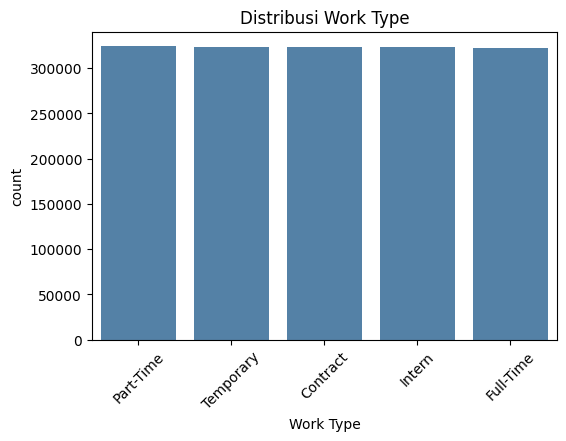

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="Work Type", data=df, order=df["Work Type"].value_counts().index, color="steelblue" )
plt.title("Distribusi Work Type")
plt.xticks(rotation=45)
plt.show()


Kelima kategori jumlahnya hampir seimbang direntang 322.000 - 324.000 dan tidak ada perbedaan signifikan diantara kategori tersebut. Distribusinya seimbang dan meminimalkan risiko bias prediksi ke kategori tertentu.

### 3.2. Role

In [ ]:
# Distribusi Work Type
df['Role'].value_counts(normalize=False)

Role
Interaction Designer            20580
Network Administrator           17470
User Interface Designer         14036
Social Media Manager            13945
User Experience Designer        13935
                                ...  
Inventory Control Specialist     3342
Budget Analyst                   3335
Clinical Nurse Manager           3324
Social Science Researcher        3321
Paid Advertising Specialist      3306
Name: count, Length: 376, dtype: int64

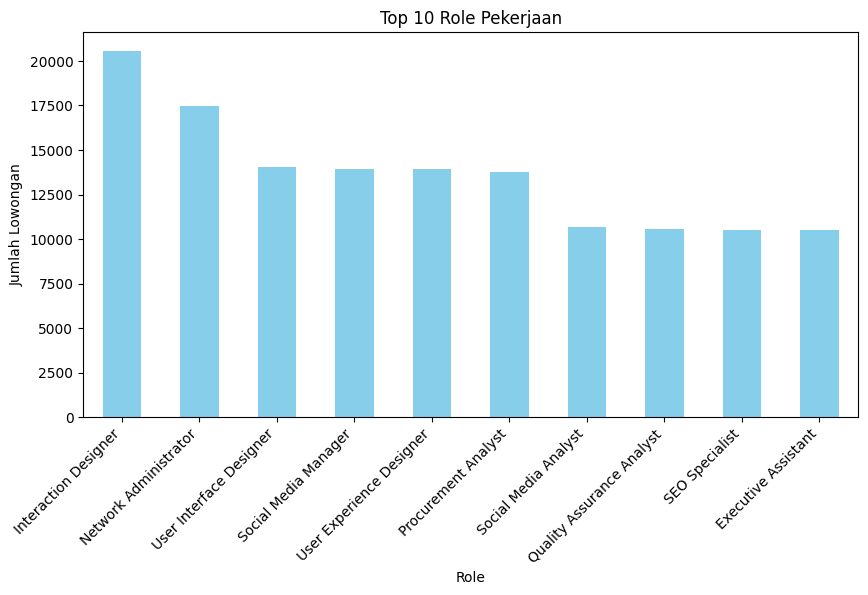

In [ ]:
# ------------------------------
# Distribusi Role
# ------------------------------
plt.figure(figsize=(10,5))
df['Role'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Role Pekerjaan")
plt.ylabel("Jumlah Lowongan")
plt.xticks(rotation=45, ha="right")
plt.show()

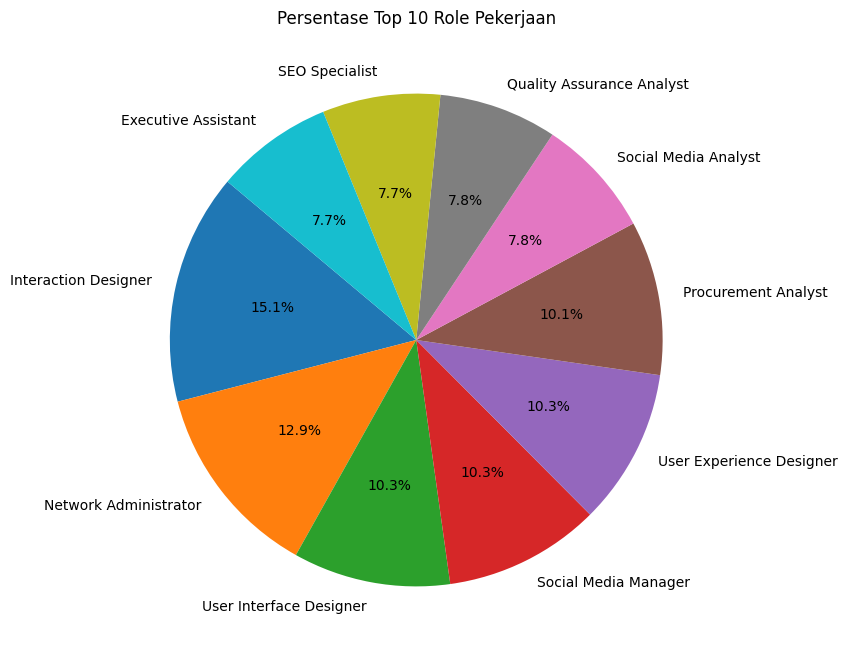

In [ ]:
plt.figure(figsize=(8,8))
role_counts = df['Role'].value_counts().head(10)
plt.pie(
    role_counts,
    labels=role_counts.index,
    autopct="%.1f%%",
    startangle=140
)
plt.title("Persentase Top 10 Role Pekerjaan")
plt.show()

Berdasarkan visualisasi tersebut, terlihat bahwa **Interaction Designer** mendominasi dengan sekitar 15% lowongan, diikuti **Network Administrator** sekitar 13%. Posisi menengah didominasi oleh **UI/UX Designer**, **Social Media Manager** dan **Procurement Analyst** masing-masing sekitar 10% menunjukkan pentingnya transformasi digital, media sosial dan efisiensi bisnis. Role lain seperti **QA**, **SEO Specialist**, **Social Media Analyst** dan **Executive Assistant** berada di kisaran 7%-8% tetap penting meski jumlahnya kecil. Secara keseluruhan, tren rekrutmen menekankan kombinasi antara teknologi digital, infrastruktur IT dan pemasaran berbasis data.

### 3.3. Preference (Gender)

In [ ]:
# Distribusi Work Type
df['Preference'].value_counts(normalize=False)

Preference
Male      539167
Both      538437
Female    538336
Name: count, dtype: int64

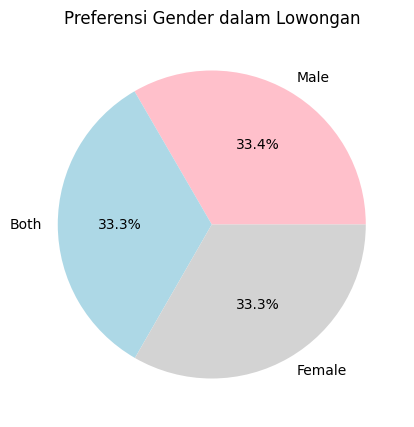

In [ ]:
# ------------------------------
# Preferensi Gender
# ------------------------------
plt.figure(figsize=(5,5))
df['Preference'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink','lightblue','lightgrey'])
plt.title("Preferensi Gender dalam Lowongan")
plt.ylabel("")
plt.show()

Distribusi yang sangat merata antara kategori tersebut. Tidak ada dominasi terhadap salah satu gender.

### 3.4. Qualifications

In [ ]:
# Distribusi Work Type
df['Qualifications'].value_counts(normalize=False)

Qualifications
BBA       162148
BA        162138
BCA       161733
M.Tech    161719
PhD       161662
MBA       161537
B.Tech    161443
M.Com     161396
B.Com     161298
MCA       160866
Name: count, dtype: int64

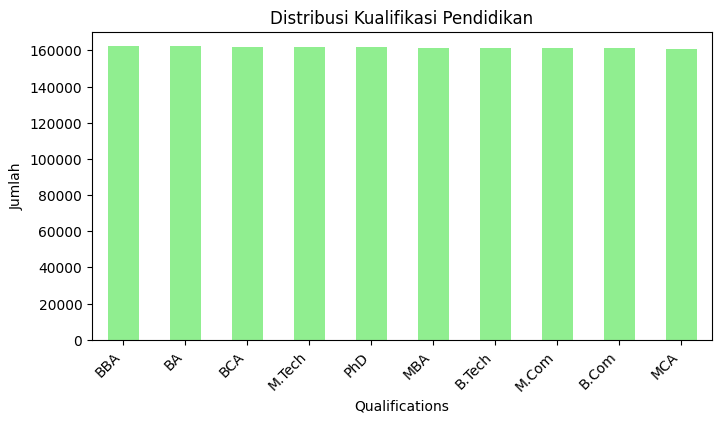

In [ ]:
# ------------------------------
# Distribusi Qualifications
# ------------------------------
plt.figure(figsize=(8,4))
df['Qualifications'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title("Distribusi Kualifikasi Pendidikan")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha="right")
plt.show()

Grafik menunjukkan distribusi kualifikasi pendidikan yang merata tanpa ada jenjang yang menonjol. Kualifikasi yang ditampilan pada grafik meliputi:
* BBA (Bachelor of Business Administration), gelar sarjana di bidang manajemen dan bisnis.
* BA (Bachelor of Arts), gelar sarjana di bidang ilmu sosial, humaniora atau seni.
* BCA (Bachelor of Computer Applications), sarjana khusus di bidang aplikasi komputer dan IT.
* B.Tech (Bachelor of Technology), sarjana teknik/teknologi.
* B.Com (Bachelor of Commerce), sarjana ekonomi, bisnis, dan akuntansi.
* MCA (Master of Computer Applications), pascasarjana di bidang komputer dan aplikasi.
* M.Tech (Master of Technology), pascasarjana teknik/teknologi.
* M.Com (Master of Commerce), pascasarjana ekonomi, bisnis, dan akuntansi.
* MBA (Master of Business Administration), pascasarjana manajemen dan bisnis.
* PhD (Doctor of Philosophy), jenjang doktoral untuk penelitian dan keahlian akademik.

Dataset mencakup di berbagai latar belakang pendidikan, mulai dari bisnis, seni, komputer, teknik hingga penelitian akademik.

### 3.5. Country

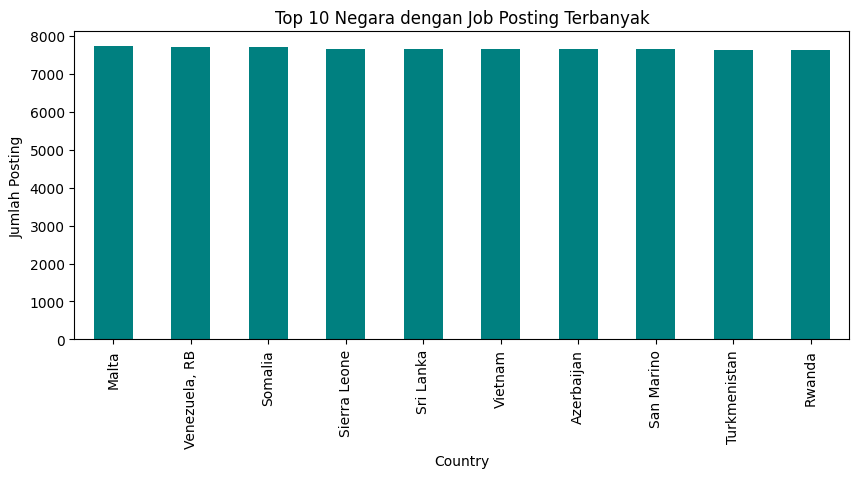

In [ ]:
# Top 10 negara
plt.figure(figsize=(10,4))
df["Country"].value_counts().head(10).plot(kind="bar", color="teal")
plt.title("Top 10 Negara dengan Job Posting Terbanyak")
plt.xlabel("Country")
plt.ylabel("Jumlah Posting")
plt.show()

Dari grafik diatas terlihat bahwa 10 negara dengan job posting terbanyak mencakup Malta, Venezuela, Somalia, Sierra Leona, Sri Lanka, Vietnam, Azerbaijan, San Marino, Turkmenistan dan Rwanda. Masing-masing memiliki jumlah posting yang hampir sama, sekitar 7.600-7.800 lowongan menunjukkan distribusi yang seimbang antar negara.

In [ ]:
import plotly.express as px

# sampling 10 ribu baris saja
df_sample = df.sample(10000, random_state=42)

fig = px.scatter_geo(
    df_sample,
    lat="latitude",
    lon="longitude",
    color="Country",
    hover_name="Job Title",
    size_max=3,
    template="plotly_dark",
    title="Job Locations"
)
fig.show()



Visualisasi diatas menampilkan sebaran job posting di seluruh dunia menggunakan peta scatter berbasis latitude-longitude dengan warna berbeda untuk setiap negara.Dari plot terlihat bahwa:
* Lowongan kerja tersebar secara global, tidak hanya terpusat di satu benua.
* Ada konsentrasi titik yang cukup padat di Eropa, Asia Selatan dan Afrika menandakan lebih banyak job posting di wilayah tersebut.
* beberapa negara seperti Panama, Tunisia, Zimbabwe, Albania hingga Sri Lanka juga terwakili dengan warna berbeda.
* Pola ini memperlihatkan keberagaman geografis dataset, mendukung analisis bahwa data mencakup banyak negara dengan distribusi merata.

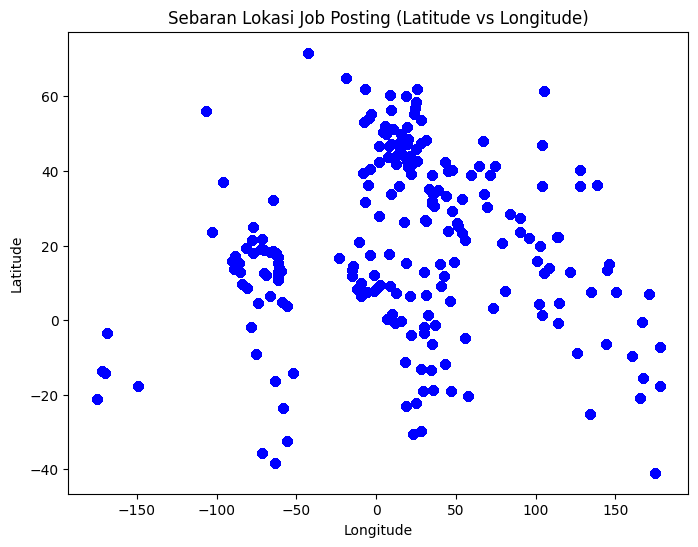

In [ ]:
# Scatter map lat-long
plt.figure(figsize=(8,6))
plt.scatter(df["longitude"], df["latitude"], alpha=0.6, c="blue")
plt.title("Sebaran Lokasi Job Posting (Latitude vs Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Grafik scatter plot memperlihatkan sebaran lokasi job posting berdasarkan koordinat geografis (latitude-longitude). Titik-titik tersebar di berbagai belahan dunia, meskipun terlihat konsentrasi lebih pada di wilayah lintang utara sekitar Eropa, Asia dan sebagai Afrika. Hal tersebut menandakan bahwa data mencakup distribusi global dengan fokus pada area yang lebih padat penduduk atau ekonomi aktif.

### 3.6. Salary Range

In [ ]:
# Ambil Salary Range lalu parsing jadi angka
salary_df = (
    df["Salary Range"]
    .str.replace(r"[\$,K]", "", regex=True)   # hilangkan $, K
    .str.split("-", expand=True)              # pisahkan jadi 2 kolom
    .astype(float) * 1000                     # ubah ke angka ribuan
)

# Ganti nama kolom
salary_df.columns = ["min_salary", "max_salary"]

# Hitung rata-rata salary
salary_df["avg_salary"] = (salary_df["min_salary"] + salary_df["max_salary"]) / 2

# Gabungkan kembali dengan df asli
df = df.join(salary_df)

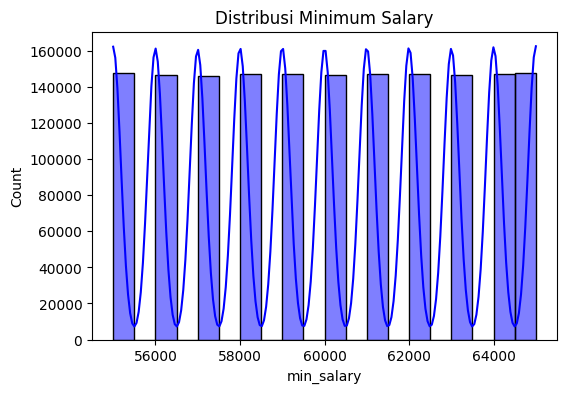

In [ ]:
# Salary min & max sudah diparsing sebelumnya
plt.figure(figsize=(6,4))
sns.histplot(df["min_salary"], bins=20, kde=True, color="blue")
plt.title("Distribusi Minimum Salary")
plt.show()

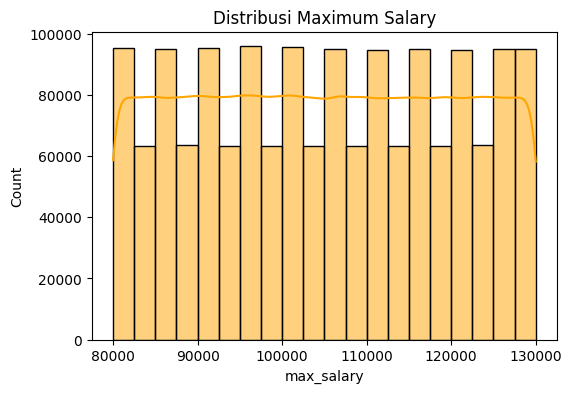

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["max_salary"], bins=20, kde=True, color="orange")
plt.title("Distribusi Maximum Salary")
plt.show()

Distribusi gaji minimum mayoritas berrada pada kisaran 55k-65k USD, relatif homogen. Namun, gaji maksimum lebih besar di kisaran 80k-130k USD yang menunjukkan adanya peluang dengan variasi kompensasi lebih besar.

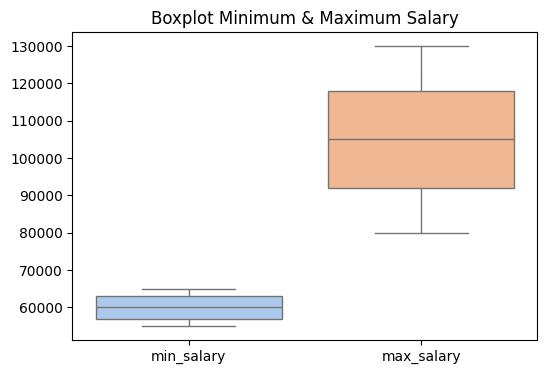

In [ ]:
# Boxplot min vs max
plt.figure(figsize=(6,4))
sns.boxplot(data=df[["min_salary","max_salary"]], palette="pastel")
plt.title("Boxplot Minimum & Maximum Salary")
plt.show()

Median gaji minimum sekitar 60k USD, sedangkan gaji maksimum berada di sekitar 105k USD. Rentang gaji maksimum jauh lebih lebar yang menandakan variasi besar antar pekerjaan/negara.

In [ ]:
avg_min = df["min_salary"].mean()
avg_max = df["max_salary"].mean()
avg_global = (df["min_salary"].mean() + df["max_salary"].mean()) / 2

print(f"Rata-rata Minimum Salary {avg_min:.2f} K USD")
print(f"Rata-rata Maximum Salary: {avg_max:.2f} K USD")
print(f"Rata-rata Global Salary: {avg_global:.2f} K USD")


Rata-rata Minimum Salary 60003.43 K USD
Rata-rata Maximum Salary: 104978.88 K USD
Rata-rata Global Salary: 82491.15 K USD


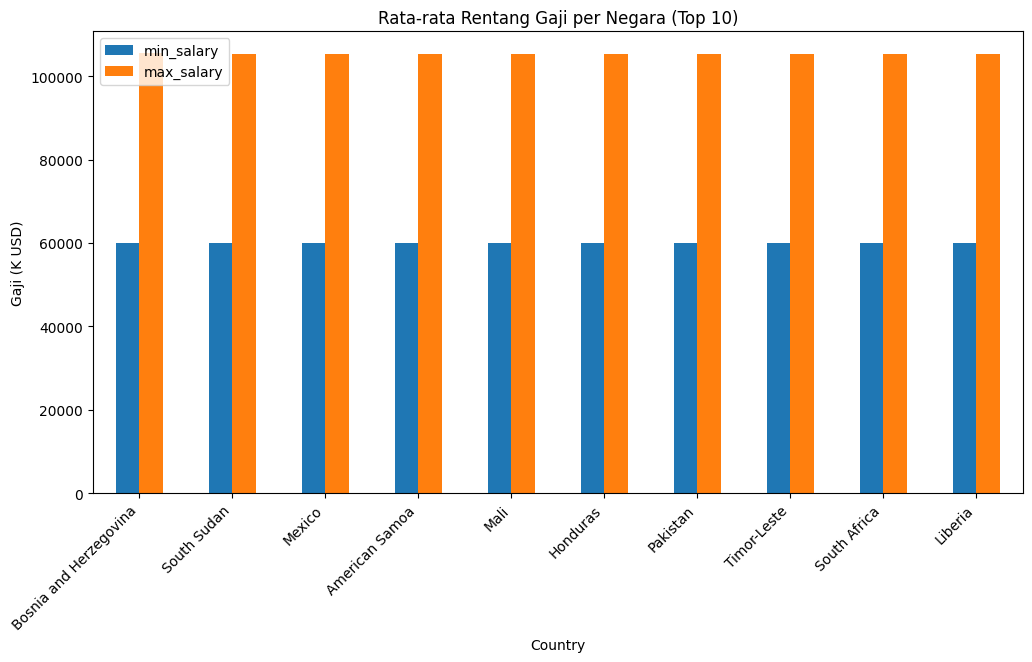

In [ ]:
# ------------------------------
# Rata-rata Salary per Country
# ------------------------------
salary_country = df.groupby('Country')[['min_salary','max_salary']].mean().sort_values('max_salary', ascending=False).head(10)
salary_country.plot(kind='bar', figsize=(12,6))
plt.title("Rata-rata Rentang Gaji per Negara (Top 10)")
plt.ylabel("Gaji (K USD)")
plt.xticks(rotation=45, ha="right")
plt.show()

Negara seperti Bosnia, South Sudan, Mexico hingga Liberia memiliki rata-rata gaji minimum sekitar 60k USD dan maksimum 105k USD yang menunjukkan pola global yang konsisten.

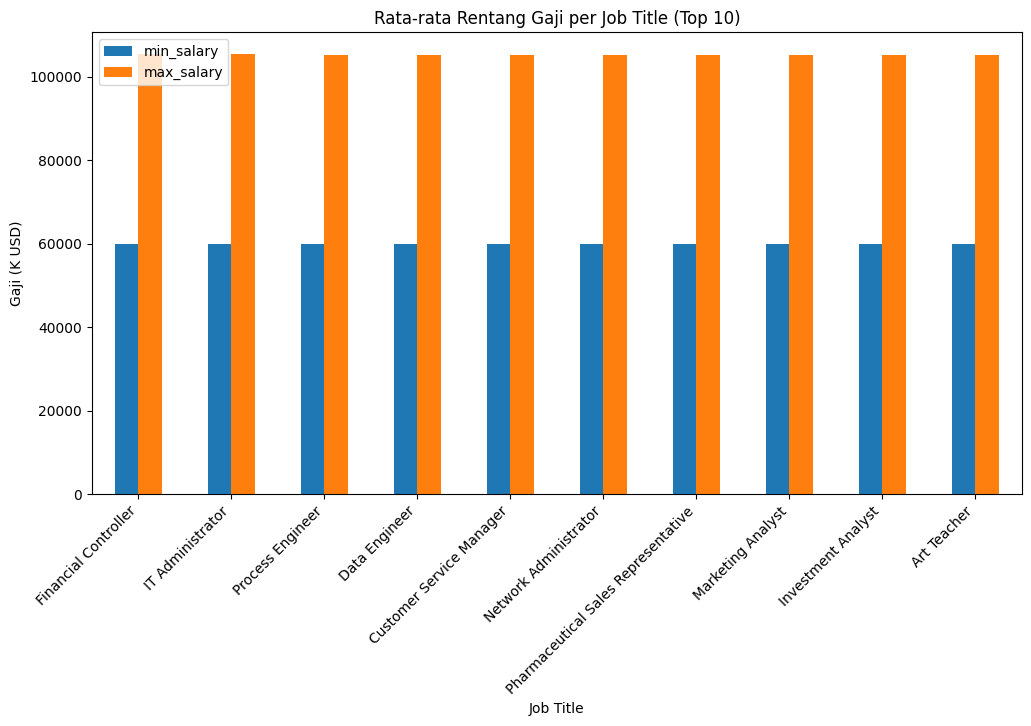

                                       min_salary     max_salary
Job Title                                                       
Financial Controller                 60019.450132  105421.175782
IT Administrator                     60040.563867  105388.665132
Process Engineer                     59992.645999  105284.931507
Data Engineer                        59980.022940  105280.443510
Customer Service Manager             60007.065114  105194.577048
Network Administrator                60000.910073  105193.219953
Pharmaceutical Sales Representative  60020.765550  105181.435407
Marketing Analyst                    59973.652093  105148.610812
Investment Analyst                   60002.094640  105144.720556
Art Teacher                          60032.513429  105141.362737


In [ ]:
# ------------------------------
# Rata-rata Salary per Job Title
# ------------------------------
salary_job = (
    df.groupby("Job Title")[["min_salary", "max_salary"]]
    .mean()
    .sort_values("max_salary", ascending=False)
    .head(10)   # ambil 10 pekerjaan dengan salary tertinggi
)

# Visualisasi
salary_job.plot(kind="bar", figsize=(12,6))
plt.title("Rata-rata Rentang Gaji per Job Title (Top 10)")
plt.ylabel("Gaji (K USD)")
plt.xticks(rotation=45, ha="right")
plt.show()

# Tampilkan data tabel
print(salary_job)


Profesi seperti **Financial Controller**, **IT Administrator**, **Data Engineer** hingga **Marketing Analyst** semuanya berada pada kisaran serupa yakni gaji minimum rata-rata 60k USD dan maksimum rata-rata 105k USD. Tidak ada gap signifikan antar job title yang menandakan standar kompensasi global yang cukup seragam.

Secara umum, pasar kerja menawarkan gaji minimum yang stabil dan memberi ruang kompetitif bagi peran-peran tertentu. Perbedaan antar negara maupun job title relatif kecil, menunjukkan adanya standar kompensasi global.

### 3.7. Job Portal

In [ ]:
# Distribusi Job Portal
job_portal_df = df["Job Portal"].value_counts().reset_index()
job_portal_df.columns = ["Job Portal", "Count"]

print("Top Job Portal:\n", job_portal_df)

Top Job Portal:
              Job Portal   Count
0              FlexJobs  129879
1   Stack Overflow Jobs  129379
2          Jobs2Careers  129245
3              Snagajob  129088
4               USAJOBS  129066
5           SimplyHired  129059
6              The Muse  129033
7              Idealist  128952
8       Internships.com  128790
9               Monster   65058
10                 Dice   64927
11         ZipRecruiter   64805
12               Indeed   64776
13        CareerBuilder   64752
14             LinkedIn   64664
15            Glassdoor   64467


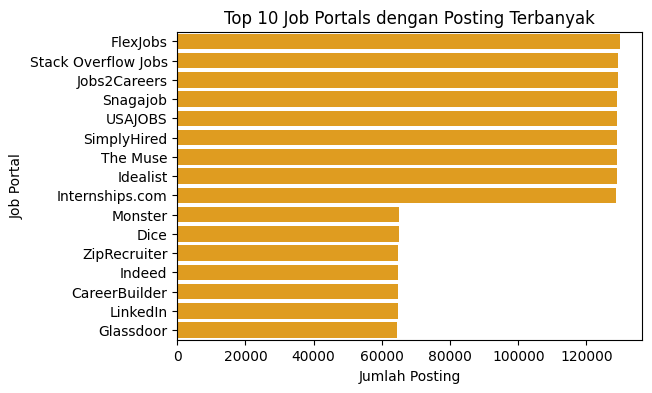

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x="Count", y="Job Portal", data=job_portal_df, color="orange")
plt.title("Top 10 Job Portals dengan Posting Terbanyak")
plt.xlabel("Jumlah Posting")
plt.ylabel("Job Portal")
plt.show()


Grafik tersebut memperlihatkan 10 portal pekerjaan dengan posting terbanyak. Flexjobs, Stack Overflow Jobs, Jobs2Careers, Snagajob, USAJOBS, SimplyHired, The Muse, Idealist dan Internships.com sangat mendominasi serta masing-masing memiliki rata-rata 120.000 posting. Sementara, portal besar seperti Glassdoor, LinkedIn, CareerBuilder, Indeed, ZipRecruiter dan Monster ada di kisaran 65.000 posting. Dengan kata lain, adanya keaktifan dalam memposting lowongan di berbagai portal.

### 3.8. Job Posting Date

In [ ]:
# ================================================
# Analisis Tanggal Posting
# ================================================
# Convert ke datetime
df["Job Posting Date"] = pd.to_datetime(df["Job Posting Date"], errors="coerce")

In [ ]:
# grup per bulan
df["YearMonth"] = df["Job Posting Date"].dt.to_period("M")
posting_per_month = df.groupby("YearMonth").size()

print(posting_per_month)


YearMonth
2021-09    35207
2021-10    68726
2021-11    66492
2021-12    68519
2022-01    68723
2022-02    61334
2022-03    68722
2022-04    66328
2022-05    68364
2022-06    66257
2022-07    69015
2022-08    67945
2022-09    66174
2022-10    68513
2022-11    66072
2022-12    68711
2023-01    68554
2023-02    61864
2023-03    68399
2023-04    66122
2023-05    69000
2023-06    66465
2023-07    68579
2023-08    68540
2023-09    33315
Freq: M, dtype: int64


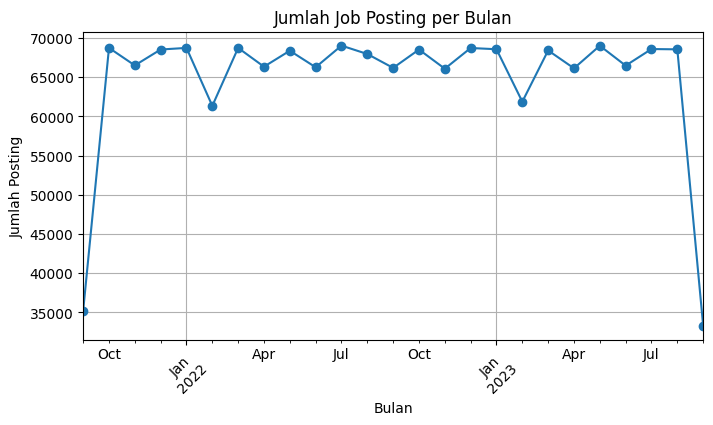

In [ ]:
# line plot tren posting per bulan
posting_per_month.plot(kind="line", marker="o", figsize=(8,4))
plt.title("Jumlah Job Posting per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Posting")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


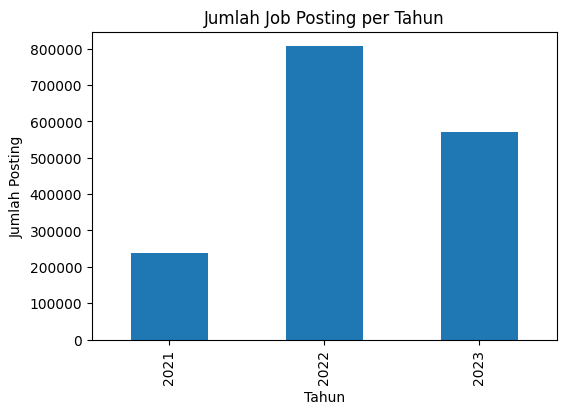

In [ ]:
# bar plot per tahun
posting_per_year = df["Job Posting Date"].dt.year.value_counts().sort_index()
posting_per_year.plot(kind="bar", figsize=(6,4))
plt.title("Jumlah Job Posting per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Posting")
plt.show()

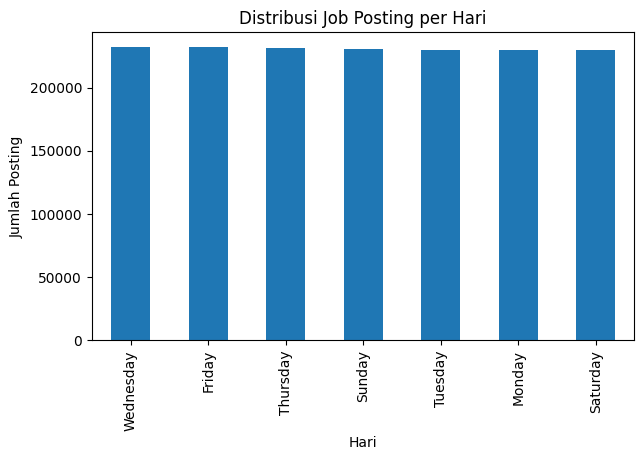

In [ ]:
# distribusi posting per hari dalam seminggu
df["weekday"] = df["Job Posting Date"].dt.day_name()
df["weekday"].value_counts().plot(kind="bar", figsize=(7,4))
plt.title("Distribusi Job Posting per Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Posting")
plt.show()


### 3.9. Job Title dan Skills

In [ ]:
job_title_counts = df["Job Title"].value_counts().reset_index()
job_title_counts.columns = ["Job Title", "Count"]
job_title_counts


Job Title  Count
0                  UX/UI Designer  48551
1    Digital Marketing Specialist  27975
2               Software Engineer  27630
3                Network Engineer  24393
4                 Software Tester  20945
..                            ...    ...
142            Personal Assistant   3441
143                   QA Engineer   3439
144       Procurement Coordinator   3424
145           Key Account Manager   3411
146             Inventory Analyst   3342

[147 rows x 2 columns]

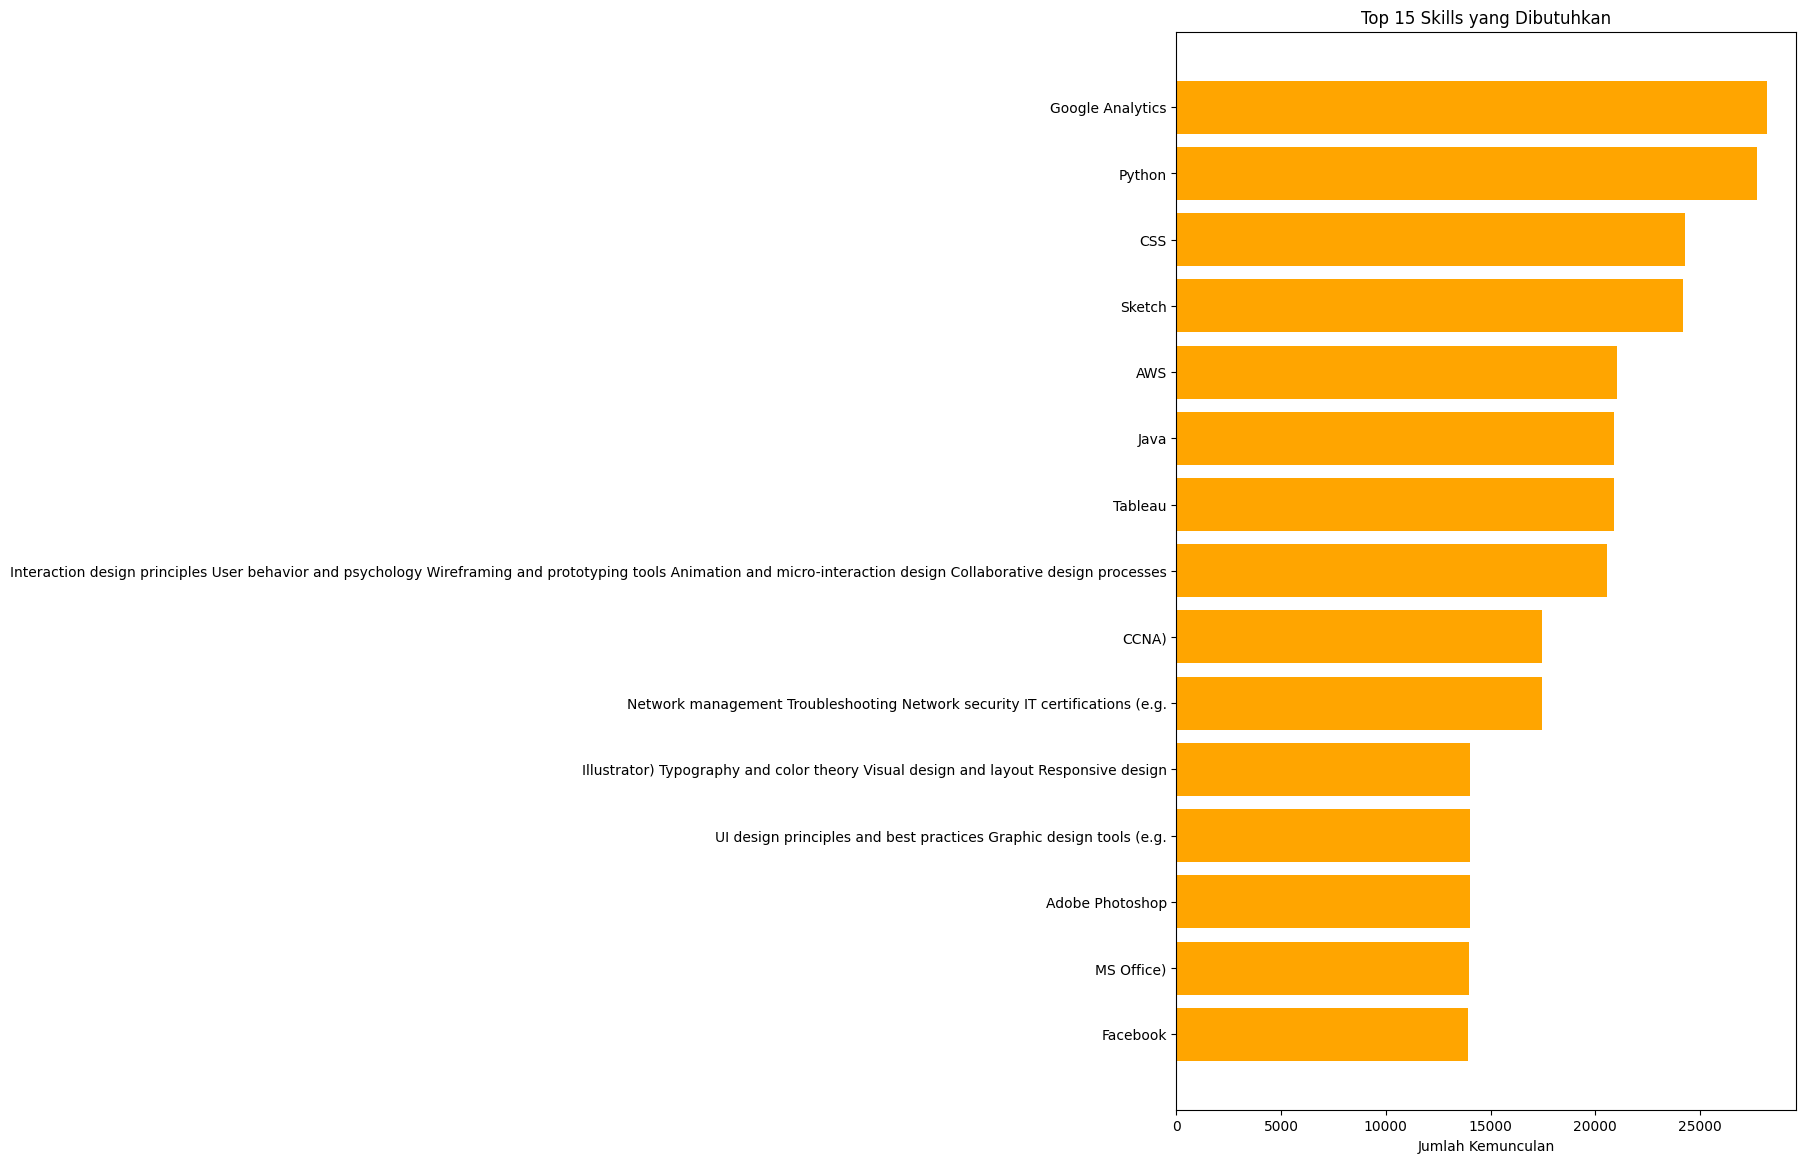

In [ ]:
from collections import Counter

# ------------------------------
# Analisis Skills (Bar Chart)
# ------------------------------
# Gabungkan semua skill jadi satu list
skills_list = []
for s in df['skills'].dropna():
    # split by koma, strip spasi
    skills_list.extend([x.strip() for x in s.split(",")])

# Hitung frekuensi skill
skill_counts = Counter(skills_list)
skill_df = pd.DataFrame(skill_counts.items(), columns=["Skill","Count"]).sort_values(by="Count", ascending=False).head(15)

plt.figure(figsize=(8,14))
plt.barh(skill_df["Skill"], skill_df["Count"], color="orange")
plt.gca().invert_yaxis()
plt.title("Top 15 Skills yang Dibutuhkan")
plt.xlabel("Jumlah Kemunculan")
plt.show()

Dengan visualisasi tersebut, dapat mengetahui kebutuhan skill umum yang dibutuhkan perusahaan. Dibeberapa bidang membutuhkan skill seperti yang dapat digambarkan pada visualisasi diatas. Pasar kerja menuntut kombinasi hard skill teknik dan soft skill/creative skill agar kandidat lebih kompetitif.

In [ ]:
from collections import Counter

def skills_for_job(job_title, top_n=10):
    # Filter dataset berdasarkan Job Title
    subset = df[df["Job Title"].str.contains(job_title, case=False, na=False)]

    # Ambil semua skills (anggap dipisahkan koma atau berada dalam dict/list string)
    all_skills = []
    for s in subset["skills"].dropna():
        if isinstance(s, str):
            all_skills.extend([x.strip() for x in s.replace("{","").replace("}","").split(",")])

    # Hitung frekuensi skill
    skill_counts = Counter(all_skills)

    # Ubah jadi dataframe biar lebih rapi
    skill_df = pd.DataFrame(skill_counts.most_common(top_n), columns=["Skill", "Count"])
    return skill_df

# Contoh: skill yang dibutuhkan untuk Web Developer
skills_for_job("UX/UI Designer", top_n=10)


Skill  Count
0  Interaction design principles User behavior an...  20580
1  UI design principles and best practices Graphi...  14036
2                                    Adobe Photoshop  14036
3  Illustrator) Typography and color theory Visua...  14036
4  User-centered design principles UX/UI design t...  13935
5                                             Sketch  13935
6  Adobe XD) Wireframing and prototyping Usabilit...  13935

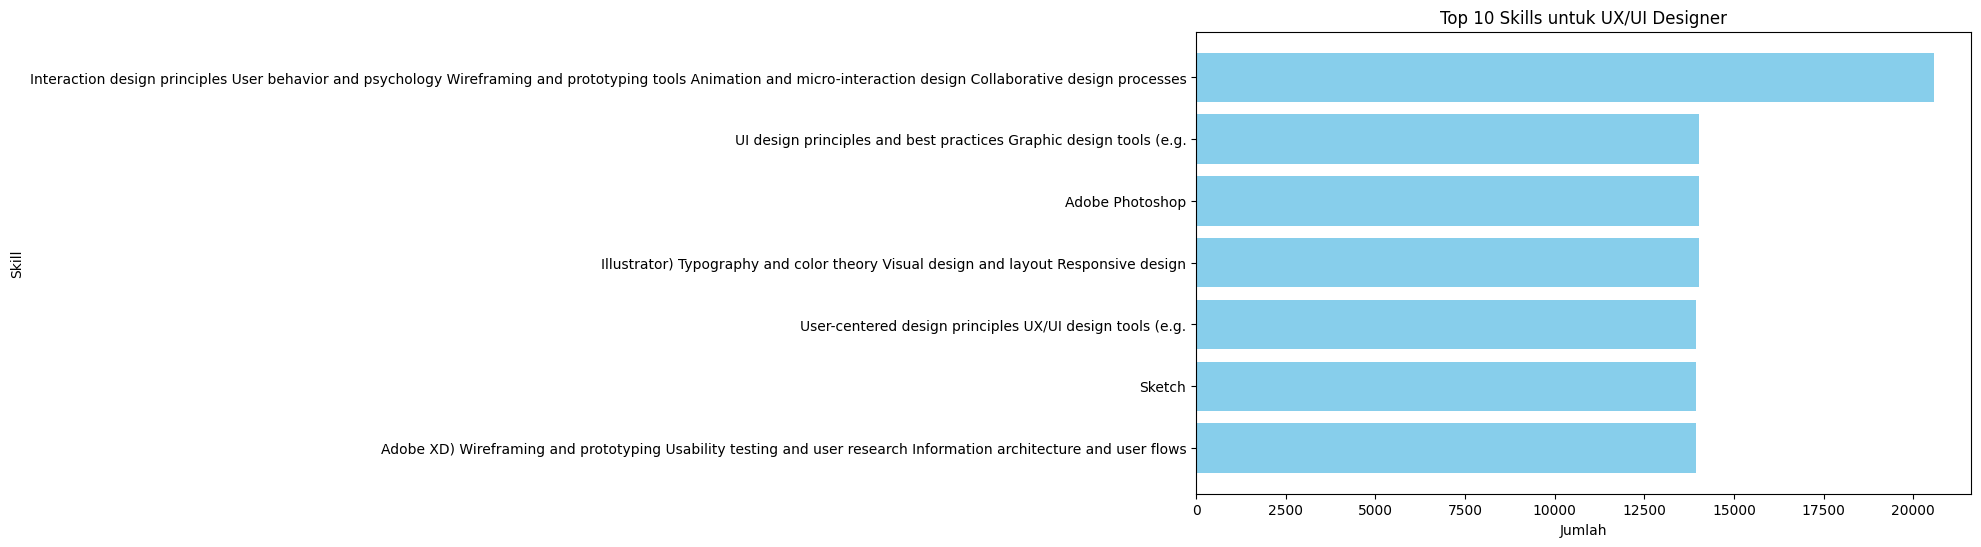

In [ ]:
import matplotlib.pyplot as plt

skill_df = skills_for_job("UX/UI Designer", top_n=10)

plt.figure(figsize=(10,6))
plt.barh(skill_df["Skill"], skill_df["Count"], color="skyblue")
plt.title("Top 10 Skills untuk UX/UI Designer")
plt.xlabel("Jumlah")
plt.ylabel("Skill")
plt.gca().invert_yaxis()
plt.show()


Dengan gambaran tersebut, kandidat dapat mengembangkan skill berdasarkan bidang yang ditekuni. Secara luas, perusahaan mencari talenta dengan skill yang sedang berkembang dan kandidar ideal sebaiknya membekali diri dengan kombinasi antara skill teknis dan soft skill untuk menjadi kandidat yang lebih unggul di pasar kerja.

### 3.10. Company

In [ ]:
# Hitung jumlah posting per company
company_df = df["Company"].value_counts().reset_index()
company_df.columns = ["Company", "Count"]
company_df


Company  Count
0                            DTE Energy   1957
1                    Berry Global Group   1941
2                      Marsh & McLennan   1941
3                                Vistra   1938
4    International Flavors & Fragrances   1928
..                                  ...    ...
883                      Kingfisher plc   1714
884              Marriott International   1712
885                             Wayfair   1702
886                  Lumen Technologies   1699
887                          Siemens AG   1678

[888 rows x 2 columns]

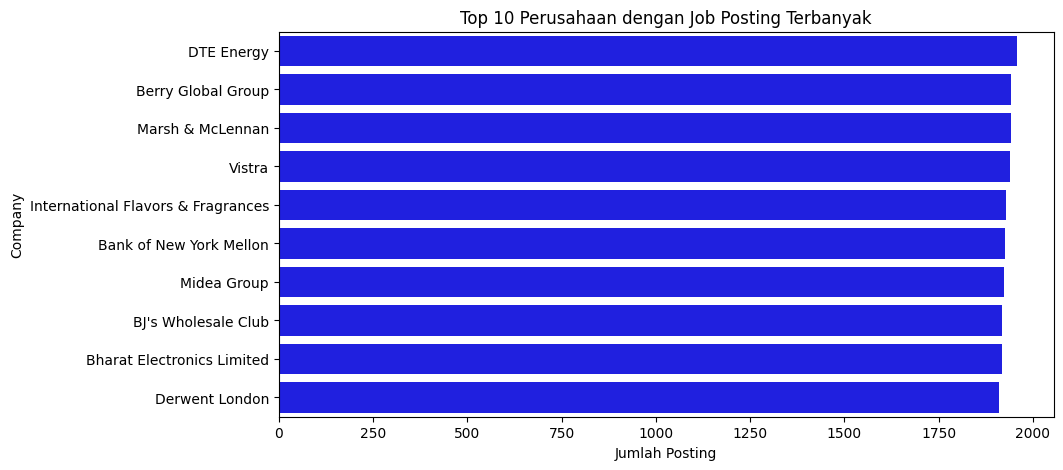

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="Count", y="Company", data=company_df.head(10), color="blue")
plt.title("Top 10 Perusahaan dengan Job Posting Terbanyak")
plt.xlabel("Jumlah Posting")
plt.ylabel("Company")
plt.show()


Perusahaan pada visualisasi diatas menempati posisi teratas dengan hampir 2.000 posting. Hal ini menunjukkan bahwa perusahaan besar dan multinasional di sektor tertentu yang sangat aktif dalam membuka kesempatan kerja. Tingginya jumlah posting dapat mengindikasikan adanya perluasan bisnis, tingginya kebutuhan tenaga kerja atau tingkat turnover yang besar. Kandidat yang ingin memperbesar peluang kerja dapat memperhatikan perusahaan-perusahaan besar karena termasuk top employer dengan banyak lowongan terbuka di berbagai bidang.

### 3.11. Company Profile

In [ ]:
import ast

# Parsing JSON string ke dict
def parse_profile(x):
    try:
        return ast.literal_eval(x)
    except:
        return {"Sector": None, "Industry": None}

parsed = df["Company Profile"].apply(parse_profile)
df["Sector"] = parsed.apply(lambda x: x.get("Sector"))
df["Industry"] = parsed.apply(lambda x: x.get("Industry"))

In [ ]:
# Top Sector dalam bentuk DataFrame
top_sector_df = df["Sector"].value_counts().reset_index()
top_sector_df.columns = ["Sector", "Count"]

# Top Industry dalam bentuk DataFrame
top_industry_df = df["Industry"].value_counts().reset_index()
top_industry_df.columns = ["Industry", "Count"]

In [ ]:
from IPython.display import display

print("\nTop Sector DataFrame:\n")
display(top_sector_df)   # tampilkan semua baris sektor

print("\nTop Industry DataFrame:\n")
display(top_industry_df) # tampilkan semua baris industri



Top Sector DataFrame:



Sector   Count
0                Financial Services  139573
1                            Energy  104048
2                            Retail   87633
3                         Insurance   73135
4                        Automotive   61862
..                              ...     ...
199            Healthcare/Hospitals    1751
200                Beverage/Alcohol    1751
201            Chemicals and Energy    1746
202  Manufacturing/Building Systems    1730
203      Technology and Engineering    1678

[204 rows x 2 columns]


Top Industry DataFrame:



Industry  Count
0                            Pharmaceuticals  54538
1                                  Chemicals  50787
2                Utilities: Gas and Electric  41874
3                         Telecommunications  40031
4                           Commercial Banks  38370
..                                       ...    ...
199       Business Services - Data/Analytics   1753
200  Food and Beverage - Alcoholic Beverages   1751
201                     Cement and Chemicals   1749
202           Manufacturing/Building Systems   1730
203                Retail - Home Improvement   1714

[204 rows x 2 columns]

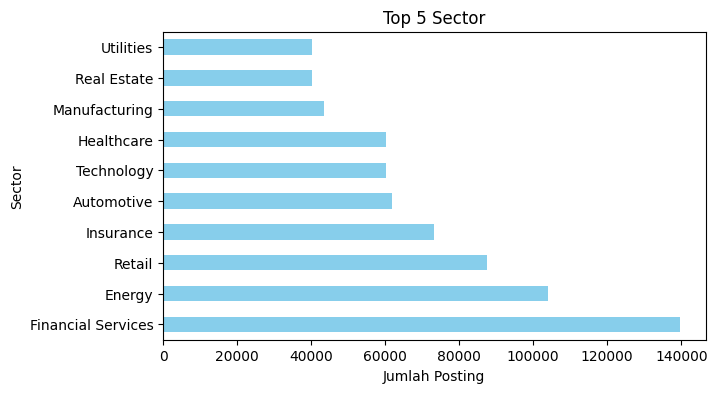

In [ ]:
plt.figure(figsize=(7,4))
df["Sector"].value_counts().head(10).plot(kind="barh", color="skyblue")
plt.title("Top 5 Sector")
plt.xlabel("Jumlah Posting")
plt.ylabel("Sector")
plt.show()

Sektor keuangan, energi dan ritel menjadi sektor utama dalam penyediaan lapangan kerja, sementara sektor tradisional seperti utilitas dan manufaktur relatif stabil namun tidak sebanyak yang modern

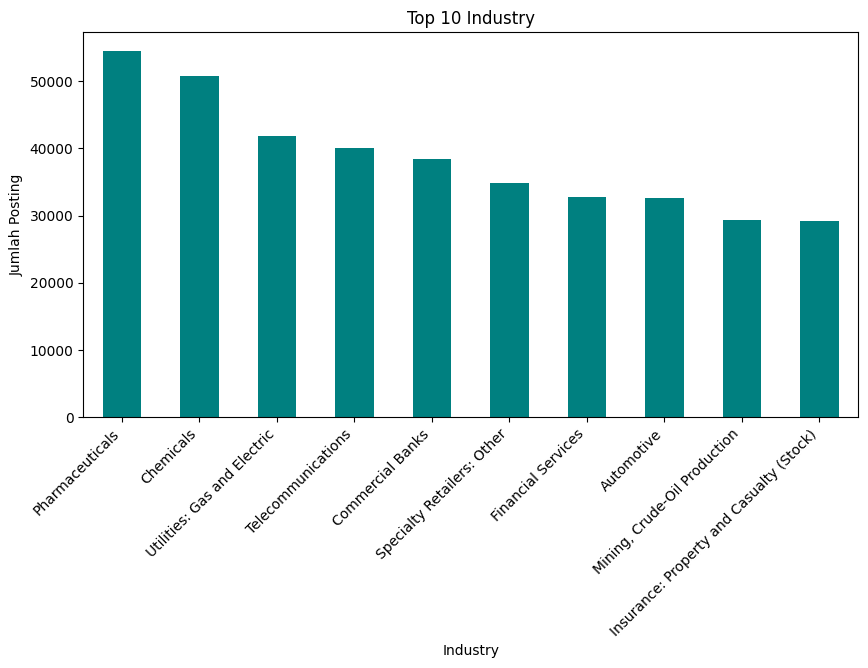

In [ ]:
plt.figure(figsize=(10,5))
df["Industry"].value_counts().head(10).plot(kind="bar", color="teal")
plt.title("Top 10 Industry")
plt.xlabel("Industry")
plt.ylabel("Jumlah Posting")
plt.xticks(rotation=45, ha="right")
plt.show()

Di level industri, yang paling agresif merekrut adalah pharmaceuticals dan chemicals yang artinya ada tren kebutuhan SDM tinggi untuk industri sains, riset dan energi.

In [ ]:
top_sectors = df["Sector"].value_counts().head(10).index
df_top_sector = df[df["Sector"].isin(top_sectors)]

top_industries = df["Industry"].value_counts().head(10).index
df_top_industry = df[df["Industry"].isin(top_industries)]

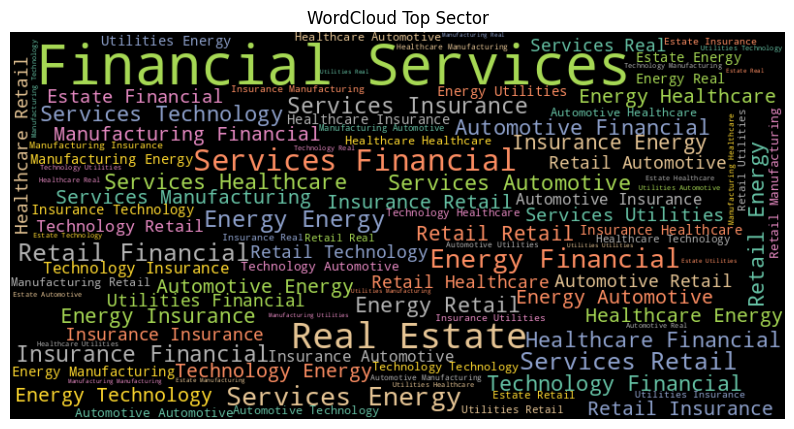

In [ ]:
from wordcloud import WordCloud

text_sector = " ".join(df_top_sector["Sector"].dropna().astype(str).tolist())
wc = WordCloud(width=800, height=400, background_color="black", colormap="Set2").generate(text_sector)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Top Sector")
plt.show()


Financial services muncul paling besar yang mana paling dominan dan konsisten menjadi pusat lowongan kerja. Energi dan Retail juga cukup besar yang menandakan kedua sektor ini juga banyak membuka peluang, walu tidak sebesar keuangan. Semakin besar kata maka semakin sering muncul dan semakin juga tinggi jumlah posting.

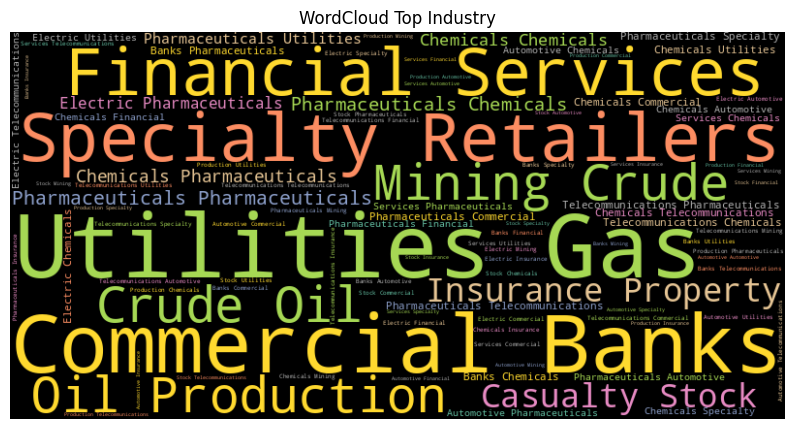

In [ ]:
from wordcloud import WordCloud

text_industry = " ".join(df_top_industry["Industry"].dropna().astype(str).tolist())
wc = WordCloud(width=800, height=400, background_color="black", colormap="Set2").generate(text_industry)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Top Industry")
plt.show()


Berdasarkan visualisasi wordcloud, terlihat bahwa industri yang paling dominan adalah Financial Services, Commercial Banks, Utilities Gas, serta Oil Production, yang menunjukkan sektor keuangan dan energi menjadi pusat utama dalam distribusi industri. Selain itu, industri seperti Specialty Retailers, Mining Crude, dan Insurance Property Casualty Stock juga cukup menonjol, menandakan kontribusi signifikan namun tidak sebesar kelompok utama. Sementara itu, industri lain seperti Pharmaceuticals, Chemicals, Telecommunications, dan Automotive tetap muncul namun dengan frekuensi yang lebih rendah.

### 3.12. Ekstraksi Kata Kunci (Job Description, Skills, Benefits dan Responsibilities)

In [ ]:
from wordcloud import WordCloud

In [ ]:
# WordCloud Job Description
text_desc = " ".join(df["Job Description"].dropna().astype(str).tolist())
wc = WordCloud(width=800, height=400, background_color="black").generate(text_desc)

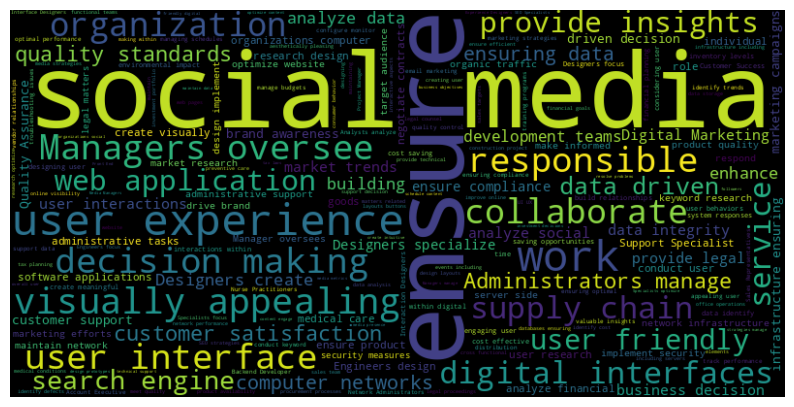

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

WordCloud pada fitur ini memperlihatkan bahwa kata-kata yang paling menonjol adalah social media, user experience, ensure, responsible, user interface, work, visually appealling dan collaborate. Mayoritas deskripsi kerja berpusat pada pengembangan pengalaman digital, pengelolaan media sosial serta kolaborasi untuk memastikan kualitas layanan dan produk.

In [ ]:
# WordCloud Skills
text_skills = " ".join(df["skills"].dropna().astype(str).tolist())
wc = WordCloud(width=800, height=400, background_color="black", colormap="Set1").generate(text_skills)

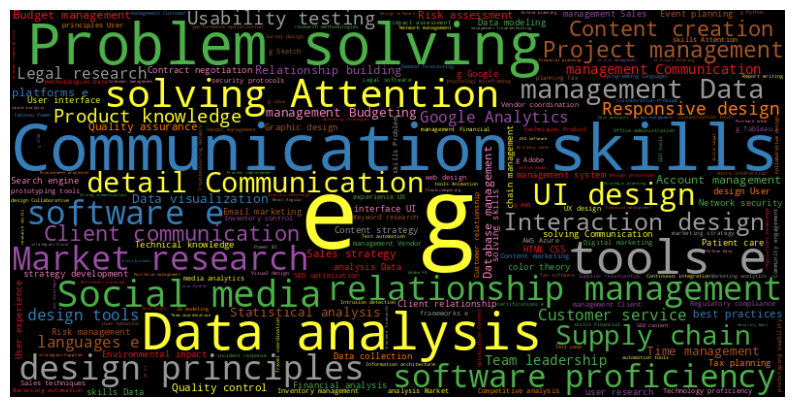

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

WordCloud pada fitur skills memperlihatkan bahwa keterampilan yang paling menonjol adalah communication skills, problem solving, data analysis, design principles, social media, market reseacrh, project management, relationship management dan software proficiency. Perusahaan mencari kombinasi soft skill dengan hard skills untuk mendukung peran yang adaptif di era digital.

In [ ]:
# WordCloud Benefits
text_benefits = " ".join(df["Benefits"].dropna().astype(str).tolist())
wc = WordCloud(width=800, height=400, background_color="black", colormap="Set1").generate(text_benefits)

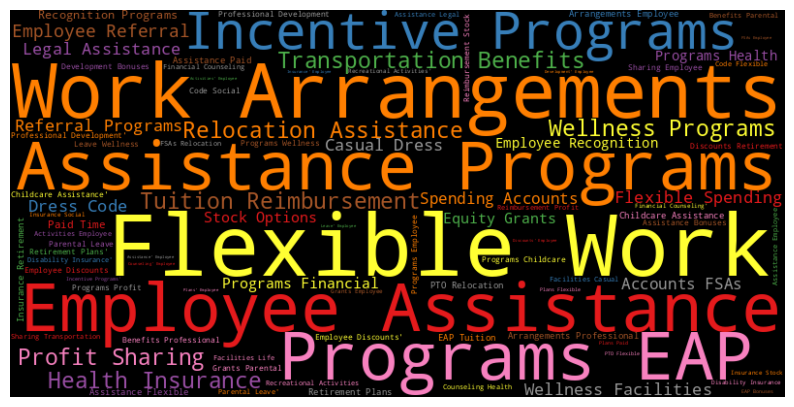

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

WordCloud fitur benefits menunjukkan bahwa perusahaan banyak menekankan pada Flexible Work Arrangements, Employee Assistance Programs (EAP), Incentive Programs, Transportation Benefits, Health Insurance, Wellness Programs, Profit Sharing, Relocation Assistance, dan Tuition Reimbursement. Yang mana perusahaan tidak hanya menawarkan kompensasi finansial, namun juga fleksibilitas, kesejahteraan dan dukungan jangka panjang untuk karyawan.

In [ ]:
# WordCloud Responsibilities
text_responsibilities = " ".join(df["Responsibilities"].dropna().astype(str).tolist())
wc = WordCloud(width=800, height=400, background_color="black", colormap="Set1").generate(text_responsibilities)

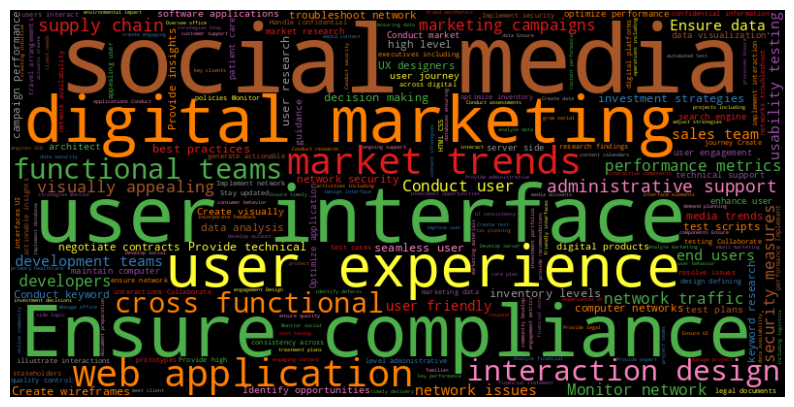

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

WordCloud Responsibilities menunjukkan bahwa tanggung jawab pekerjaan banyak berfokus pada social media, user interface, user experience, digital marketing, dan web application. Kata kunci seperti ensure compliance, market trends, cross functional teams, interaction design, dan performance metrics juga menonjol. Jadi, Jadi, tanggung jawab utama pekerjaan menggabungkan teknologi, pemasaran digital, desain pengalaman pengguna, serta kepatuhan regulasi.

### 3.13. Experience

In [ ]:
# Hitung jumlah posting per kategori Experience
exp_df = df["Experience"].value_counts().reset_index()
exp_df.columns = ["Experience", "Count"]

print("Distribusi Experience:\n", exp_df)


Distribusi Experience:
        Experience  Count
0    5 to 8 Years  34120
1   5 to 12 Years  34056
2    5 to 9 Years  34020
3   3 to 13 Years  33915
4   3 to 15 Years  33878
5    2 to 9 Years  33862
6    3 to 8 Years  33854
7   1 to 11 Years  33820
8   3 to 12 Years  33805
9   1 to 10 Years  33793
10  4 to 11 Years  33776
11   3 to 9 Years  33744
12  4 to 14 Years  33744
13  4 to 12 Years  33737
14   2 to 8 Years  33736
15  4 to 15 Years  33732
16  0 to 11 Years  33729
17  1 to 13 Years  33724
18   4 to 8 Years  33715
19  2 to 13 Years  33712
20   1 to 9 Years  33710
21  1 to 12 Years  33703
22  0 to 15 Years  33693
23  1 to 15 Years  33681
24   1 to 8 Years  33680
25  3 to 11 Years  33663
26  0 to 14 Years  33650
27  5 to 14 Years  33629
28  4 to 10 Years  33621
29   0 to 9 Years  33601
30  5 to 11 Years  33600
31  5 to 13 Years  33592
32  2 to 14 Years  33584
33   0 to 8 Years  33575
34  1 to 14 Years  33570
35  2 to 10 Years  33532
36  3 to 14 Years  33530
37  0 to 12 Years  33523
3

In [ ]:
# Urutan experience berdasarkan distribusi global
experience_order = df["Experience"].value_counts().index.tolist()

# Buat pivot table Job Title x Experience
experience_by_job = (
    df.groupby("Job Title")["Experience"]
    .value_counts()
    .unstack()
    .fillna(0)
)

# Reorder kolom sesuai distribusi global
experience_by_job = experience_by_job[experience_order]

# Urutkan job title berdasarkan total terbanyak
experience_by_job = experience_by_job.loc[
    experience_by_job.sum(axis=1).sort_values(ascending=False).index
]

experience_by_job


Experience                    5 to 8 Years  5 to 12 Years  5 to 9 Years  \
Job Title                                                                 
UX/UI Designer                         999           1015          1012   
Digital Marketing Specialist           585            588           597   
Software Engineer                      588            554           566   
Network Engineer                       503            494           541   
Software Tester                        440            450           429   
...                                    ...            ...           ...   
Personal Assistant                      65             78            69   
QA Engineer                             67             76            79   
Procurement Coordinator                 70             79            70   
Key Account Manager                     68             64            63   
Inventory Analyst                       61             73            64   

Experience                    3 to 13 Years  3 to 15 Years  2 to 9 Years  \
Job Title                                                                  
UX/UI Designer                         1062            974           972   
Digital Marketing Specialist            572            571           577   
Software Engineer                       593            591           561   
Network Engineer                        516            519           532   
Software Tester                         455            437           450   
...                                     ...            ...           ...   
Personal Assistant                       90             78            75   
QA Engineer                              66             72            82   
Procurement Coordinator                  76             74            82   
Key Account Manager                      70             85            53   
Inventory Analyst                        83             74            58   

Experience                    3 to 8 Years  1 to 11 Years  3 to 12 Years  \
Job Title                                                                  
UX/UI Designer                        1007           1021           1020   
Digital Marketing Specialist           576            580            616   
Software Engineer                      630            555            559   
Network Engineer                       482            537            519   
Software Tester                        445            418            414   
...                                    ...            ...            ...   
Personal Assistant                      58             70             71   
QA Engineer                             70             74             70   
Procurement Coordinator                 75             89             61   
Key Account Manager                     72             79             68   
Inventory Analyst                       70             67             62   

Experience                    1 to 10 Years  4 to 11 Years  3 to 9 Years  \
Job Title                                                                  
UX/UI Designer                         1003           1007           988   
Digital Marketing Specialist            568            564           593   
Software Engineer                       605            588           562   
Network Engineer                        538            497           504   
Software Tester                         431            428           431   
...                                     ...            ...           ...   
Personal Assistant                       51             73            61   
QA Engineer                              75             68            77   
Procurement Coordinator                  64             72            70   
Key Account Manager                      66             80            70   
Inventory Analyst                        58             75            64   

Experience                    4 to 14 Years  4 to 12 Year

Rentang pengalaman sangat bervariasi, mulai dari 0 hingga 15 tahun, tergantung posisi. Pekerjaan seperti UX/UI Designer, Digital Marketing Specialist, Software Engineer, Network Engineer, dan Software Tester memiliki jumlah posting yang tinggi di hampir semua rentang pengalaman, menandakan bahwa posisi tersebut banyak dicari. Untuk posisi dengan keterampilan teknis seperti Software Engineer atau QA Engineer, ada permintaan stabil mulai dari entry level (0–3 tahun) hingga mid-senior level (10+ tahun). Sementara posisi seperti Personal Assistant atau Procurement Coordinator lebih dominan pada level menengah (3–10 tahun).

Mayoritas pekerjaan tetap terbuka untuk berbagai tingkat pengalaman, tetapi role teknis cenderung lebih fleksibel (terima dari fresh graduate hingga senior), sedangkan role administratif/koordinatif lebih sering menuntut pengalaman menengah keatas.

# Feature Engineering

In [7]:
import re

In [8]:
# ==============================
# Experience -> min, max, avg
# ==============================
def parse_experience(exp):
    if pd.isna(exp):
        return (None, None, None)
    nums = re.findall(r'\d+', exp)
    if len(nums) == 2:
        min_exp, max_exp = map(int, nums)
        return (min_exp, max_exp, (min_exp + max_exp) / 2)
    elif len(nums) == 1:
        val = int(nums[0])
        return (val, val, val)
    return (None, None, None)

df[["min_experience", "max_experience", "avg_experience"]] = df["Experience"].apply(
    lambda x: pd.Series(parse_experience(x))
)

Fitur experience diubah menjadi data numerik agar lebih mudah digunakan untuk analisis statistik, visualisasi maupun model machine learning. Selain itu, dapat digunakan untuk filter kandidat atau prediksi gaji/kelayakan. Sehingga proses transformasi teks ke numerik ini lebih informatif dan siap digunakan sebagai fitur dalam model.

In [9]:
# ==============================
# Salary Range -> min, max, avg
# ==============================
def parse_salary(sal):
    if pd.isna(sal):
        return (None, None, None)
    nums = re.findall(r'\d+', sal.replace("K", "000"))
    if len(nums) == 2:
        min_sal, max_sal = map(int, nums)
        return (min_sal, max_sal, (min_sal + max_sal) / 2)
    return (None, None, None)

df[["min_salary", "max_salary", "avg_salary"]] = df["Salary Range"].apply(
    lambda x: pd.Series(parse_salary(x))
)

Fitur salary diubah datanya yang semula berbentuk teks menjadi lebih terstruktur dan bernilai numerik. Transformasi ini dapat melihat distribusi gaji yang dibutuhkan suatu pekerjaan. Data numerik ini lebih mudah diolah sehingga lebih efektif bekerja dengan data terukur dibanding data dalam format teks mentah.

In [10]:
# ==============================
# 3. Job Posting Date -> datetime + fitur waktu
# ==============================
df["Job Posting Date"] = pd.to_datetime(df["Job Posting Date"], errors="coerce")
df["posting_year"] = df["Job Posting Date"].dt.year
df["posting_month"] = df["Job Posting Date"].dt.month
df["posting_dayofweek"] = df["Job Posting Date"].dt.day_name()

Dengan memecah tanggal menjadi fitur waktu, dapat dianalisis pola rekrutmen berdasarkan periode. Contohnya apakah lowongan lebih banyak diposting di awal tahun, bulan tertentu atau pada hari kerja tertentu. Selain itu, fitur ini dapat digunakan dalam machine learning untuk memprediksi kapan perusahaan membuka lowongan.

In [11]:
# ==============================
# Company Profile -> Sector & Industry
# ==============================
def parse_profile(profile):
    if pd.isna(profile):
        return (None, None)
    try:
        # Pastikan format JSON-like → dict
        prof_dict = eval(profile) if isinstance(profile, str) else profile
        return (prof_dict.get("Sector"), prof_dict.get("Industry"))
    except:
        return (None, None)

df[["Sector", "Industry"]] = df["Company Profile"].apply(
    lambda x: pd.Series(parse_profile(x))
)

Dengan memecah informasi tersebut, dapat dilakukan analisis lebih mendetail tentang sektor atau industri mana yang paling banyak membuka lowongan. Data ini berisi data semi-tersruktur (mirip JSON/dictionary) yang menyimpan informasi tentang Sector dan Industry sehingga perlu dilakukan pemisahan.

# Data Preprocessing

## 1. Library

In [ ]:
!pip install replicate
!pip install langchain_community
!pip install langchain_experimental

import os
import re
import pandas as pd
from langchain_community.llms import Replicate
from dotenv import load_dotenv

## 2. Cek Missing Values

In [12]:
missing_values = df.isnull().sum()
print(missing_values)

Job Id                  0
Experience              0
Qualifications          0
Salary Range            0
location                0
Country                 0
latitude                0
longitude               0
Work Type               0
Company Size            0
Job Posting Date        0
Preference              0
Contact Person          0
Contact                 0
Job Title               0
Role                    0
Job Portal              0
Job Description         0
Benefits                0
skills                  0
Responsibilities        0
Company                 0
Company Profile      5478
min_experience          0
max_experience          0
avg_experience          0
min_salary              0
max_salary              0
avg_salary              0
posting_year            0
posting_month           0
posting_dayofweek       0
Sector               7322
Industry             7322
dtype: int64


In [13]:
df["Company Profile"] = df["Company Profile"].fillna("unknown")
df["Sector"] = df["Sector"].fillna("unknown")
df["Industry"] = df["Industry"].fillna("unknown")

In [15]:
missing_values = df.isnull().sum()
print(missing_values)

Job Id               0
Experience           0
Qualifications       0
Salary Range         0
location             0
Country              0
latitude             0
longitude            0
Work Type            0
Company Size         0
Job Posting Date     0
Preference           0
Contact Person       0
Contact              0
Job Title            0
Role                 0
Job Portal           0
Job Description      0
Benefits             0
skills               0
Responsibilities     0
Company              0
Company Profile      0
min_experience       0
max_experience       0
avg_experience       0
min_salary           0
max_salary           0
avg_salary           0
posting_year         0
posting_month        0
posting_dayofweek    0
Sector               0
Industry             0
dtype: int64


## 3. Cek Duplicated Data

In [14]:
df_str = df.astype(str)  # ubah semua kolom ke string
duplicates = df_str.duplicated().sum()
print("Jumlah duplikasi:", duplicates)

Jumlah duplikasi: 0


## 4. Normalisasi Teks

In [ ]:
import re
import pandas as pd

def normalize_text(text):
    """
    Normalisasi teks umum agar konsisten.
    Bisa dipakai untuk 'skills', 'job title', 'company', 'qualifications', dll.
    """
    if text is None or (isinstance(text, float) and pd.isna(text)):
        return ""

    # Kalau input berupa list/tuple → gabung jadi string
    if isinstance(text, (list, tuple)):
        text = " ".join(map(str, text))

    # Bersihkan simbol/tanda kutip yang tidak perlu
    s = re.sub(r"[{}'\"]", "", str(text))

    # Hilangkan karakter non-alfanumerik berlebih, kecuali spasi
    s = re.sub(r"[^a-zA-Z0-9\s.,\-+/]", " ", s)

    # Ganti spasi berulang jadi satu spasi
    s = re.sub(r"\s+", " ", s)

    # Trim dan lowercase
    s = s.strip().lower()

    return s


In [ ]:
df["Country"] = df["Country"].apply(normalize_text)
df["location"] = df["location"].apply(normalize_text)
df["Work Type"] = df["Work Type"].apply(normalize_text)
df["Preference"] = df["Preference"].apply(normalize_text)
df["Job Title"] = df["Job Title"].apply(normalize_text)
df["Role"] = df["Role"].apply(normalize_text)
df["Job Description"] = df["Job Description"].apply(normalize_text)
df["Benefits"] = df["Benefits"].apply(normalize_text)
df["skills"] = df["skills"].apply(normalize_text)
df["Responsibilities"] = df["Responsibilities"].apply(normalize_text)
df["Sector"] = df["Sector"].apply(normalize_text)
df["Industry"] = df["Industry"].apply(normalize_text)
df["posting_dayofweek"] = df["posting_dayofweek"].apply(normalize_text)

## 5. Membuat representasi teks terstruktur

In [ ]:
def make_doc(row):
    return f"""
Judul Pekerjaan: {row.get('Job Title', '')}
Role/Konteks: {row.get('Role', '')}
Perusahaan: {row.get('Company', '')}
Lokasi: {row.get('location', '')}, {row.get('Country', '')}

Gaji:
- Range: {row.get('Salary Range', '')}
- Minimum: {row.get('min_salary', '')}
- Maksimum: {row.get('max_salary', '')}
- Rata-rata: {row.get('avg_salary', '')}

Pengalaman:
- Range: {row.get('Experience', '')}
- Minimum: {row.get('min_experience', '')}
- Maksimum: {row.get('max_experience', '')}
- Rata-rata: {row.get('avg_experience', '')}

Kualifikasi: {row.get('Qualifications', '')}
Keahlian: {row.get('skills', '')}

Deskripsi Pekerjaan:
{row.get('Job Description', '')}

Tanggung Jawab:
{row.get('Responsibilities', '')}

Benefit:
{row.get('Benefits', '')}

Sektor & Industri:
- Sector: {row.get('Sector', '')}
- Industry: {row.get('Industry', '')}

Tanggal Posting: {row.get('Job Posting Date', '')}
"""

# Tambahkan kolom dokumen siap pakai
df["doc_text"] = df.apply(make_doc, axis=1)


Langkah ini dilakukan untuk menghasilkan **doc_text** sebagai langkah menyiapkan data LLM. Tujuannya agar LLM lebih mudah memahami jika informasi disajikan dalam bentuk teks terstruktur yang menyerupai dokumen manusiawi. LLM bekerja paling baik saat diberi teks yang memiliki konteks menyeluruh. Dengan menyatukan data menjadi satu paragraf/dokumen, model bisa "membaca" seluruh atribut lowongan sebagai satu kesatuan, bukan potongan-potongan angka/teks.

Jika sistem nanti menggunakan RAG (Retrieval-Augmented Generation) atau pencarian berbasis vektor, dokumen hasil make_doc lebih cocok untuk di-embed karena berisi kombinasi informasi numerik + deskriptif. Hasil embedding akan lebih representatif. selain itu, saat melatih atau menguji LLM untuk rekomendasi pekerjaan atau pencocokan kandidat, dokumen dengan format seragam membuat model lebih mudah belajar pola. Jika nanti hasil rekomendasi ditampilkan ke user, doc_text bisa langsung dipakai sebagai output yang rapi, tanpa harus merangkai ulang potongan data.

In [ ]:
df.to_csv("/content/drive/MyDrive/CapstoneProjectHactiv8/Dataset/job_dataset.csv", index=False)

In [ ]:
df.head()

Job Id     Experience Qualifications Salary Range    location  \
0  1089843540111562  5 to 15 Years         M.Tech    $59K-$99K     douglas   
1   398454096642776  2 to 12 Years            BCA   $56K-$116K    ashgabat   
2   481640072963533  0 to 12 Years            PhD   $61K-$104K       macao   
3   688192671473044  4 to 11 Years            PhD    $65K-$91K  porto-novo   
4   117057806156508  1 to 12 Years            MBA    $64K-$87K    santiago   

            Country  latitude  longitude  Work Type  Company Size  \
0       isle of man   54.2361    -4.5481     intern         26801   
1      turkmenistan   38.9697    59.5563     intern        100340   
2  macao sar, china   22.1987   113.5439  temporary         84525   
3             benin    9.3077     2.3158  full-time        129896   
4             chile  -35.6751   -71.5429     intern         53944   

  Job Posting Date Preference      Contact Person                Contact  \
0       2022-04-24     female  Brandon Cunningham   001-381-930-7517x737   
1       2022-12-19     female    Francisco Larsen           461-509-4216   
2       2022-09-14       male         Gary Gibson             9687619505   
3       2023-02-25     female          Joy Lucero  +1-820-643-5431x47576   
4       2022-10-11     female       Julie Johnson      343.975.4702x9340   

                      Job Title                       Role    Job Portal  \
0  digital marketing specialist       social media manager      Snagajob   
1                 web developer     frontend web developer      Idealist   
2            operations manager    quality control manager  Jobs2Careers   
3              network engineer  wireless network engineer      FlexJobs   
4                 event manager         conference manager  Jobs2Careers   

                                     Job Description  \
0  social media managers oversee an organizations...   
1  frontend web developers design and implement u...   
2  quality control managers establish and enforce...   
3  wireless network engineers design, implement, ...   
4  a conference manager coordinates and manages c...   

                                            Benefits  \
0  flexible spending accounts fsas , relocation a...   
1  health insurance, retirement plans, paid time ...   
2  legal assistance, bonuses and incentive progra...   
3  transportation benefits, professional developm...   
4  flexible spending accounts fsas , relocation a...   

                                              skills  \
0  social media platforms e.g., facebook, twitter...   
1  html, css, javascript frontend frameworks e.g....   
2  quality control processes and methodologies st...   
3  wireless network design and architecture wi-fi...   
4  event planning conference logistics budget man...   

                                    Responsibilities  \
0  manage and grow social media accounts, create ...   
1  design and code user interfaces for websites, ...   
2  establish and enforce quality control standard...   
3  design, configure, and optimize wireless netwo...   
4  specialize in conference and convention planni...   

                            Company  \
0                 Icahn Enterprises   
1      PNC Financial Services Group   
2  United Services Automobile Assn.   
3                              Hess   
4                      Cairn Energy   

                                     Company Profile  min_experience  \
0  {"Sector":"Diversified","Industry":"Diversifie...             5.0   
1  {"Sector":"Financial Services","Industry":"Com...             2.0   
2  {"Sector":"Insurance","Industry":"Insurance: P...             0.0   
3  {"Sector":"Energy","Industry":"Mining, Crude-O...             4.0   
4  {"Sector":"Energy","Industry":"Energy - Oil & ...             1.0   

   max_experience  avg_experience  min_salary  max_salary  avg_salary  \
0            15.0            10.0     59000.0     99000.0     79000.0   
1            12.0             7.0     56000.0    1160

# Training (Fine Tuning LLM IBM Granite)

In [ ]:
# Ambil API Token dari Colab secret
# ======================================================
from google.colab import userdata
api_token = userdata.get('api_token')
os.environ['REPLICATE_API_TOKEN'] = api_token

API token diperoleh melalui Replicate dan disimpan di Colab secret storage **(userdata)** lalu menyimpannya ke dalam environment variabel **(os.environment)**



```
# Inisialisasi LLM dengan parameter lengkap
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    model_kwargs={
        "temperature": 0.2,
        "max_length": 500,
        "min_length": 50,
        "top_p": 0.9,
        "top_k": 50,
        "repetition_penalty": 1.1,
        "presence_penalty": 0.5,
        "frequency_penalty": 0.5,  # Parameter tambahan untuk mengurangi frekuensi kata
        "seed": 42,                # Parameter tambahan untuk reproduksi hasil
        "stop_sequences": "\n\n"
    }
)
```

In [ ]:
# Inisialisasi LLM
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    model_kwargs={
        "temperature": 0.2,
        "max_new_tokens": 300,
        "min_new_tokens": 50,
        "top_p": 0.9,
        "top_k": 50
    }
)

Hubungkan model LLM di Replicate dengan IBM Granite. Kemudian mengatur perilaku keluaran model dengan parameter, seperti mengendalikan bagaimana model merespons panjang teks minimal/maksimal, tingkat variasi jawaban dan seberapa besar kemungkinan kata-kata jarang dipakai akai muncul. Selain itu, membuat jawaban model lebih stabil dan sesuai kebutuhan.

Kode tersebut menyiapkan mesin otak AI (LLM) agar dapat dipanggil kapan saja untuk menghasilkan teks dengan aturan khusus supaya jawabannya konsisten, cukup panjang dan relevan dengan instruksi.

In [ ]:
from langchain_experimental.agents import create_pandas_dataframe_agent
agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,   # untuk lihat log langkah-langkah reasoning
    allow_dangerous_code=True  # biar bisa eksekusi code pandas
)

Kode ini berfungsi untuk membuat agen cerdas yang dapat langsung berinteraksi dengan DataFrame menggunakan bahasa alami. Agen ini merupakan jembatan antara LLM dan DataFrame. Interaksi ini otomatis menulis dan menjalan kode pandas di belakang layar untuk memberikan jawaban.

# Testing

In [ ]:
MAX_CHARS_PER_DOC = 1000
MAX_DOCS = 5

def ask_granite_safe(query, docs, llm):
    """
    Query IBM Granite dengan context yang aman.
    Batasi jumlah dokumen dan panjang tiap dokumen.
    """
    if not docs:  # kalau docs kosong
        context = "Tidak ada konteks yang relevan ditemukan."
    else:
        # Ambil maksimal MAX_DOCS dokumen & potong tiap dokumen
        docs_limited = [d[:MAX_CHARS_PER_DOC] for d in docs[:MAX_DOCS]]
        context = "\n\n".join(docs_limited)

    prompt = f"""
Gunakan konteks berikut untuk menjawab pertanyaan secara singkat dan jelas:

{context}

Pertanyaan: {query}
Jawaban:
"""
    # invoke() dipakai agar tidak deprecated
    return llm.invoke(prompt)

Kode ini diberi batasan untuk setiap dokumen hanya boleh 1000 karakter dan jika lebih akan dipotong. Selain itu, hanya boleh ambil maksimal 2 dokumen sebagai konteks untuk mencegah input prompt terlalu panjang yang membuat proses lebih lambat dan kemungkinan terkena **context length limit model**.

Fungsi **ask_granite_safe** sebagai fungsi helper untuk bertanya ke IBM Granite dengan **context window management**. Fungsi tersebut memastikan dokumen tidak terlalu panjang, jumlah dokumen dibatasi, prompt selalu bersih dan ringkas serta query tetap aman, efisien dan hemat biaya token.

In [ ]:
# Contoh penggunaan
query = "Skill apa yang paling sering muncul pada lowongan Data Scientist?"

# Ambil doc_text relevan berdasarkan Job Title
relevant_docs = df[df["Job Title"].str.contains("data scientist", case=False)]["doc_text"].tolist()

# Panggil Granite dengan context terbatas
answer = ask_granite_safe(query, relevant_docs, llm)

print("=== Pertanyaan ===")
print(query)
print("\n=== Jawaban Granite ===")
print(answer)

=== Pertanyaan ===
Skill apa yang paling sering muncul pada lowongan Data Scientist?

=== Jawaban Granite ===
Based on the provided job listings, the most frequently mentioned skills for Data Scientist roles are:

1. Machine learning algorithms
2. Python programming
3. Data preprocessing
4. Deep learning model evaluation
5. Data integration (ETL)
6. Big data technologies (e.g., Hadoop, Spark)
7. Database management
8. Data warehousing

These skills are common across various industries and companies, indicating their importance in Data Scientist roles.


In [ ]:
# Contoh penggunaan
query = "berapa banyak postingan job di bidang digital marketing pada tahun 2022?"

# Ambil doc_text relevan berdasarkan Job Title
relevant_docs = df[df["Job Title"].str.contains("Digital Marketing", case=False)]["doc_text"].tolist()

# Panggil Granite dengan context terbatas
answer = ask_granite_safe(query, relevant_docs, llm)

print("=== Pertanyaan ===")
print(query)
print("\n=== Jawaban Granite ===")
print(answer)

=== Pertanyaan ===
berapa banyak postingan job di bidang digital marketing pada tahun 2022?

=== Jawaban Granite ===
The provided information does not include specific data on the number of digital marketing job postings in 2022. To answer this question accurately, one would need to refer to job market research reports, databases, or platforms that track job postings, such as LinkedIn, Indeed, Glassdoor, or specialized job market analysis firms. These resources typically provide annual reports or statistics on job postings across various industries, including digital marketing.


In [ ]:
# -----------------
# Contoh pertanyaan kuantitatif
# -----------------
query = "berapa banyak postingan job di bidang digital marketing pada tahun 2022?"

response = agent.run(query)

print("\n=== Pertanyaan ===")
print(query)
print("\n=== Jawaban Granite + Pandas Agent ===")
print(response)



> Entering new AgentExecutor chain...


/tmp/ipython-input-3627355966.py:6: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = agent.run(query)


Thought: To answer this question, I need to filter the dataframe `df` to only include rows where the Job Title is "digital marketing specialist" and the Posting Year is 2022. Then, I will count the number of rows that meet these criteria.

Action: python_repl_ast

Action Input:
```python
len(df[(df['Job Title'] == 'digital marketing specialist') & (df['posting_year'] == 2022)])
```
13770Final Answer: There is 13,770 job postings in the field of digital marketing in the year 2022.

> Finished chain.

=== Pertanyaan ===
berapa banyak postingan job di bidang digital marketing pada tahun 2022?

=== Jawaban Granite + Pandas Agent ===
There is 13,770 job postings in the field of digital marketing in the year 2022.


Terdapat perbedaan hasil dari ketiga LLM tersebut. Perbedaan tersebut dikarenakan terdapat perbedaan deployment serta pertanyaan yang diajukan seperti ada pertanyaan yang tidak mengakses dataframe dan pertanyaan yang mampu mengakses dataframe. Sehingga diperlukan dua contoh sebagai perbedaan yang mana hasil dari pembuatan dokumen teks terstruktur dan hasil akses dataframe.

# Evaluation

In [ ]:
!pip install rouge

In [ ]:
# === Import Library ===
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from rouge import Rouge
from langchain_community.embeddings import HuggingFaceEmbeddings

# === Inisialisasi Embedding Model ===
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# === Evaluasi Cosine (TF-IDF) ===
def evaluate_with_cosine(pred, ref):
    vect = TfidfVectorizer().fit([pred, ref])
    tfidf = vect.transform([pred, ref])
    return cosine_similarity(tfidf[0:1], tfidf[1:2])[0][0]

# === Evaluasi ROUGE ===
def evaluate_with_rouge(pred, ref):
    rouge = Rouge()
    return rouge.get_scores(pred, ref, avg=True)

# === Evaluasi Semantic Similarity (Embedding) ===
def evaluate_with_embedding(pred, ref):
    if not ref:
        return None
    emb_pred = embedding_model.embed_query(pred)
    emb_ref = embedding_model.embed_query(ref)
    return cosine_similarity([emb_pred], [emb_ref])[0][0]

# === Evaluasi pakai LLM-as-a-Judge ===
def llm_judge(question, prediction, reference=None, llm=llm):
    judge_prompt = f"""
Anda adalah evaluator jawaban LLM.

Pertanyaan: {question}

Jawaban Model:
{prediction}

Jawaban Referensi (jika ada):
{reference if reference else "Tidak tersedia"}

Beri penilaian (0-10) untuk:
1. Akurasi
2. Kelengkapan
3. Relevansi

Format keluaran:
Akurasi: x/10
Kelengkapan: y/10
Relevansi: z/10
"""
    return llm.invoke(judge_prompt)

# === Pipeline Evaluasi ===
def evaluate_llm(df, queries, references):
    results = []
    for q, ref in zip(queries, references):
        # Ambil context relevan (misal berdasarkan Job Title mengandung "data")
        relevant_docs = df[df["Job Title"].str.contains("data", case=False)]["doc_text"].tolist()
        prediction = ask_granite_safe(q, relevant_docs, llm)

        # Evaluasi otomatis
        cosine_score = evaluate_with_cosine(prediction, ref) if ref else None
        rouge_score = evaluate_with_rouge(prediction, ref) if ref else None
        embed_score = evaluate_with_embedding(prediction, ref) if ref else None

        # Evaluasi LLM-as-judge
        judge_eval = llm_judge(q, prediction, ref)

        results.append({
            "question": q,
            "prediction": prediction,
            "reference": ref,
            "cosine": cosine_score,
            "rouge": rouge_score,
            "embedding_sim": embed_score,
            "judge_eval": judge_eval
        })

    return pd.DataFrame(results)

# === Contoh Queries & References ===
queries = [
    "Skill apa yang paling sering muncul pada lowongan Data Scientist?",
    "Skill apa yang wajib dimiliki seorang Data Analyst?",
    "Apa perbedaan skill utama antara Software Engineer dan Data Scientist?",
    "Berapa rata-rata gaji untuk posisi Data Analyst?",
    "Berapa gaji minimum untuk Software Engineer?",
    "Berapa kisaran gaji untuk pekerjaan Digital Marketing Specialist?",
]

references = [
    "Skill yang sering muncul: Python, SQL, Machine Learning, Statistik.",
    "Skill wajib Data Analyst: Excel, SQL, Python/R, kemampuan visualisasi data.",
    "Data Scientist fokus pada Machine Learning, Software Engineer fokus pada coding & arsitektur software.",
    "Rata-rata gaji Data Analyst sekitar $70K-$90K tergantung lokasi.",
    "Gaji minimum Software Engineer sekitar $60K.",
    "Kisaran gaji Digital Marketing Specialist sekitar $59K-$99K.",
]

# === Jalankan Evaluasi ===
eval_df = evaluate_llm(df, queries, references)

print("=== Hasil Evaluasi LLM ===")
display(eval_df)


/tmp/ipython-input-1934017831.py:9: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public model

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

=== Hasil Evaluasi LLM ===


question  \
0  Skill apa yang paling sering muncul pada lowon...   
1  Skill apa yang wajib dimiliki seorang Data Ana...   
2  Apa perbedaan skill utama antara Software Engi...   
3   Berapa rata-rata gaji untuk posisi Data Analyst?   
4       Berapa gaji minimum untuk Software Engineer?   
5  Berapa kisaran gaji untuk pekerjaan Digital Ma...   

                                          prediction  \
0  Based on the provided job descriptions, the sk...   
1  Seorang Data Analyst wajib memiliki beberapa k...   
2  Software Engineer dan Data Scientist memiliki ...   
3  The average salary for a Data Analyst position...   
4  Tidak ada deskripsi pekerjaan "Software Engine...   
5  Maaf, informasi tentang gaji untuk pekerjaan D...   

                                           reference    cosine  \
0  Skill yang sering muncul: Python, SQL, Machine...  0.014802   
1  Skill wajib Data Analyst: Excel, SQL, Python/R...  0.296008   
2  Data Scientist fokus pada Machine Learning, So...  0.340036   
3  Rata-rata gaji Data Analyst sekitar $70K-$90K ...  0.073971   
4       Gaji minimum Software Engineer sekitar $60K.  0.267381   
5  Kisaran gaji Digital Marketing Specialist seki...  0.226087   

                                               rouge  embedding_sim  \
0  {'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'r...       0.527565   
1  {'rouge-1': {'r': 0.6, 'p': 0.0461538461538461...       0.581236   
2  {'rouge-1': {'r': 0.5833333333333334, 'p': 0.0...       0.644170   
3  {'rouge-1': {'r': 0.25, 'p': 0.125, 'f': 0.166...       0.378564   
4  {'rouge-1': {'r': 0.5, 'p': 0.1304347826086956...       0.522347   
5  {'rouge-1': {'r': 0.5714285714285714, 'p': 0.0...       0.582535   

                                          judge_eval  
0  Akurasi: 9/10\nKelengkapan: 9/10\nRelevansi: 1...  
1  Akurasi: 9/10\nKelengkapan: 9/10\nRelevansi: 1...  
2  Akurasi: 10/10\nKelengkungan: 10/10\nRelevansi...  
3  Akurasi: 7/10\nKelengkapan: 8/10\nRelevansi: 9...  
4  Akurasi: 0/10\nKelengkungan: 10/10\nRelevansi:...  
5  Akurasi: 10/10\nKelengkungan: 10/10\nRelevansi...

Berdasarkan hasil evaluasi, terlihat bahwa metrik seperti cosine similarity dan ROUGE memberikan skor yang relatif rendah pada sebagian besar jawaban. Hal ini wajar karena model cenderung melakukan parafrasa atau menggunakan struktur kalimat berbeda dari jawaban referensi, sehingga kesamaan berbasis kata tidak tertangkap dengan baik. Sebaliknya, evaluasi berbasis semantic embedding menunjukkan skor yang lebih konsisten (sekitar 0.4–0.6), menandakan bahwa secara makna jawaban model cukup dekat dengan referensi meskipun secara tekstual berbeda.

Pendekatan LLM-as-a-judge memberikan gambaran yang lebih kaya. Misalnya, pada pertanyaan tentang gaji minimum Software Engineer, model menyatakan bahwa konteks tidak tersedia, sehingga dievaluasi dengan skor akurasi rendah (0/10) tetapi kelengkapan tinggi (10/10). Hal ini menegaskan bahwa LLM mampu menilai jawaban secara lebih nyambung dengan konteks, berbeda dengan metrik tradisional yang sekadar menghitung kesamaan kata.

Secara umum, hasil ini menunjukkan bahwa IBM Granite mampu memberikan jawaban yang relevan dan masuk akal, meskipun tidak selalu identik dengan referensi yang disiapkan. Evaluasi kombinasi metrik kuantitatif (cosine, ROUGE, embedding similarity) dan kualitatif (LLM-as-a-judge) memberikan gambaran yang lebih seimbang tentang performa model. Dari sini dapat disimpulkan bahwa reliance penuh pada metrik berbasis teks kurang tepat, dan melibatkan LLM sebagai evaluator justru lebih efektif untuk menangkap kualitas jawaban secara semantik maupun kontekstual.

# Deployment

In [ ]:
# Install
!pip install langchain_community
!pip install langchain_experimental
!pip install streamlit pyngrok -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.6 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata

api_token = userdata.get("api_token")  # pastikan sudah tersimpan di Colab secrets
print(api_token[:8], "...")  # cek sebagian token, jangan tampilkan full

with open("/content/drive/MyDrive/CapstoneProjectHactiv8/.env", "w") as f:
    f.write(f"REPLICATE_API_TOKEN={api_token}\n")

print("✅ File .env berhasil dibuat di /content/drive/MyDrive/CapstoneProjectHactiv8/.env")

r8_8s8ZC ...
✅ File .env berhasil dibuat di /content/drive/MyDrive/CapstoneProjectHactiv8/.env


In [ ]:
from pyngrok import ngrok
ngrok.kill()  # matikan semua session

In [ ]:
import os
from pyngrok import ngrok
from google.colab import userdata

# Token Ngrok
ngrok_token = userdata.get("ngrok_token")  # pastikan sudah disimpan di Colab secret
!ngrok config add-authtoken {ngrok_token}

# ======================================
# Jalankan Streamlit App
# ======================================
!streamlit run /content/drive/MyDrive/CapstoneProjectHactiv8/app.py --server.port 8501 &>/content/logs.txt &

# ======================================
# Buka tunnel ngrok
# ======================================

public_url = ngrok.connect(8501)
print("✅ Aplikasi bisa diakses di:", public_url)

# ======================================
# Cek log kalau app tidak muncul
# ======================================
!tail -n 20 /content/logs.txt


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
✅ Aplikasi bisa diakses di: NgrokTunnel: "https://ca1406355e4e.ngrok-free.app" -> "http://localhost:8501"
